In [1]:
import pandas as pd
from sklearn import ensemble
# строка ниже открывает графики на этой же странице, без неё будет в новом окне
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Image

from sklearn import cross_validation
from sklearn.cross_validation import cross_val_predict
from sklearn import datasets
from sklearn import metrics
from sklearn import tree
import xgboost as xgb

In [2]:
test = pd.read_csv('random_data', index_col=False)
test.index = range(0,len(test))
test

,0,1,2,3,4,5,6,7,8,9,...,27,28,29,30,31,32,33,34,35,37
0,-0.733346,-0.939105,-0.942700,-1.363418,-1.700080,-0.656761,-0.660002,-0.610312,-0.615479,-0.737539,...,-0.099121,-0.307622,-0.462907,0.112813,-0.450915,1.513701,-0.999965,0.873621,0.0,0
1,-0.733346,-0.938466,-0.941618,0.001238,0.443375,-0.656761,-0.660002,-0.610312,-0.615479,-0.737539,...,-0.094490,-0.299345,-0.460308,0.113636,-0.450212,1.513713,-0.998541,0.873631,0.0,1
2,-0.733346,-0.938786,-0.941774,-0.150969,-0.173338,-0.656761,0.553883,-0.610312,-0.212411,-0.737539,...,-0.094254,-0.298925,-0.460176,0.113679,-0.450176,1.513714,-0.998469,0.873631,0.0,0
3,-0.733346,-0.935885,-0.940528,-0.150969,-0.173338,-0.656761,-0.660002,-0.610312,-0.615479,-0.737539,...,-0.090694,-0.292610,-0.458168,0.114317,-0.449631,1.513724,-0.997367,0.873640,0.0,1
4,-0.733346,-0.935560,-0.940372,0.153445,0.170717,0.576925,-0.660002,-0.203112,-0.615479,1.293758,...,-0.090658,-0.292546,-0.458148,0.114323,-0.449626,1.513724,-0.997356,0.873640,0.0,3
5,-0.733346,-0.935560,-0.940372,0.001238,-0.001310,0.576925,-0.660002,-0.203112,-0.615479,1.293758,...,-0.090047,-0.291466,-0.457802,0.114433,-0.449531,1.513725,-0.997166,0.873642,0.0,0
6,-0.733346,-0.936534,-0.940841,-0.303176,-0.345366,-0.656761,0.553883,-0.610312,0.190658,-0.737539,...,-0.089741,-0.290926,-0.457629,0.114488,-0.449485,1.513726,-0.997071,0.873642,0.0,0
7,-0.733346,-0.916176,-0.929656,0.669780,0.754290,-0.656761,-0.660002,-0.610312,-0.615479,-0.737539,...,-0.088219,-0.288241,-0.456767,0.114763,-0.449250,1.513731,-0.996598,0.873646,0.0,1
8,-0.733346,-0.930258,-0.936245,-0.814220,-0.922957,-0.656761,0.553883,-0.610312,1.543983,-0.737539,...,-0.087582,-0.287120,-0.456406,0.114878,-0.449152,1.513732,-0.996399,0.873648,0.1,0
9,-0.733346,-0.966291,-0.967930,0.001238,1.586715,-0.656761,-0.660002,-0.610312,-0.615479,-0.737539,...,-0.084178,-0.281148,-0.454472,0.115496,-0.448624,1.513742,-0.995336,0.873656,0.1,3


In [20]:
a = test['-0.733346']
print a.size
a.drop_duplicates().size

1214493


300

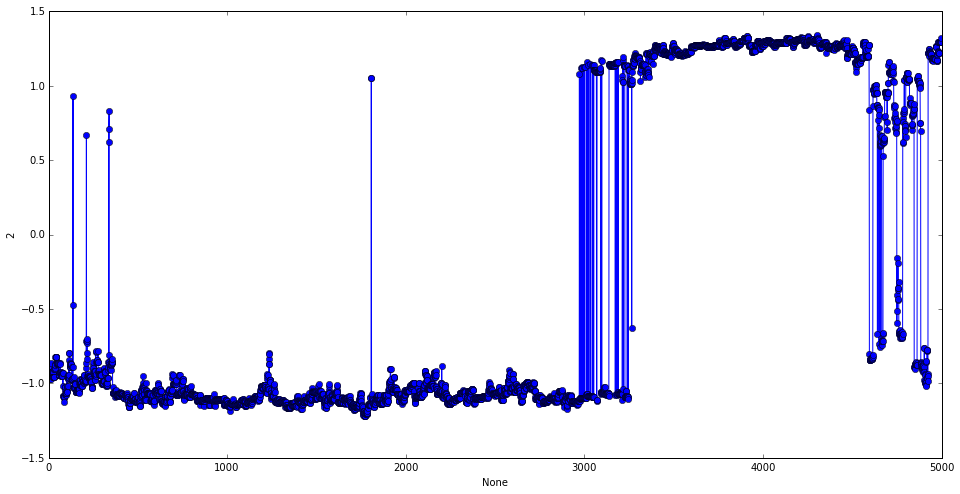

In [26]:
from IPython.display import Image
from itertools import combinations
from matplotlib.colors import ListedColormap

def plotc(c1,c2,label_values):
    fig = plt.figure(figsize=(16,8))
    
    plt.plot(c1, c2, '-bo')
    plt.xlabel(c1.name)
    plt.ylabel(c2.name)

plotc(test[:5000].index, test[:5000]['2'], [])

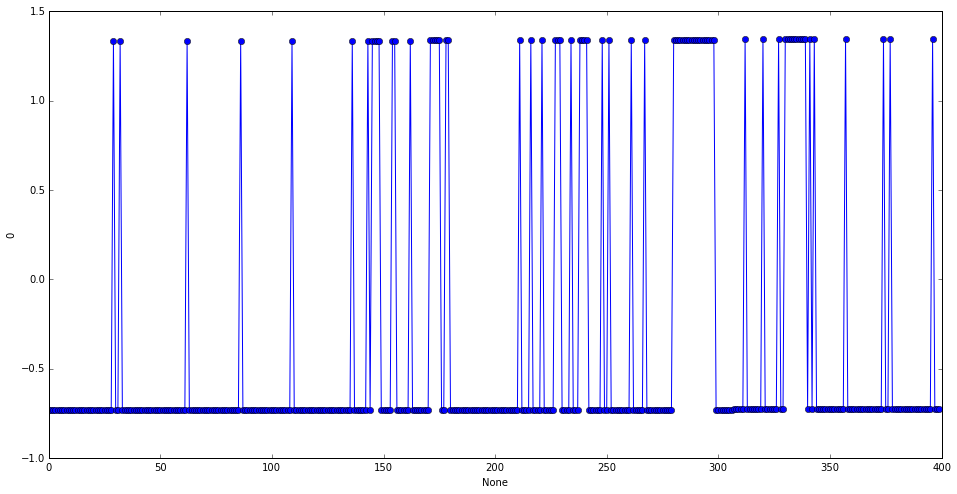

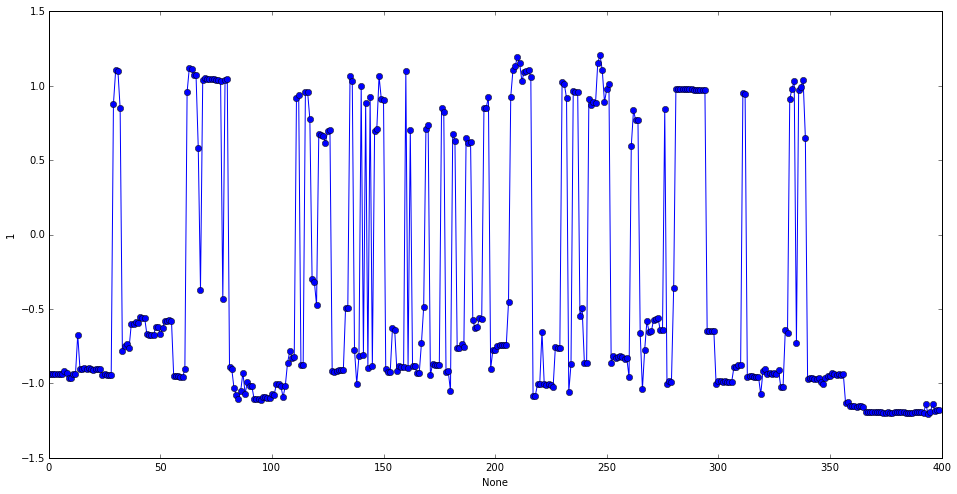

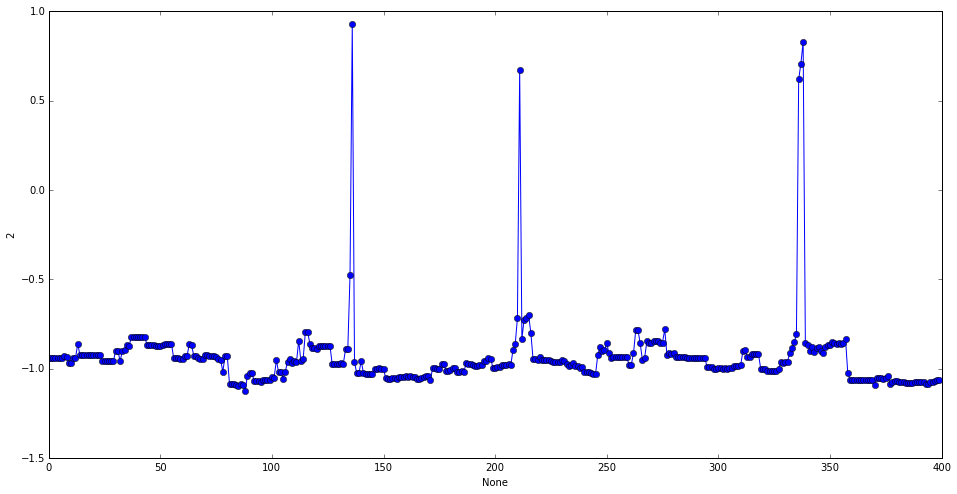

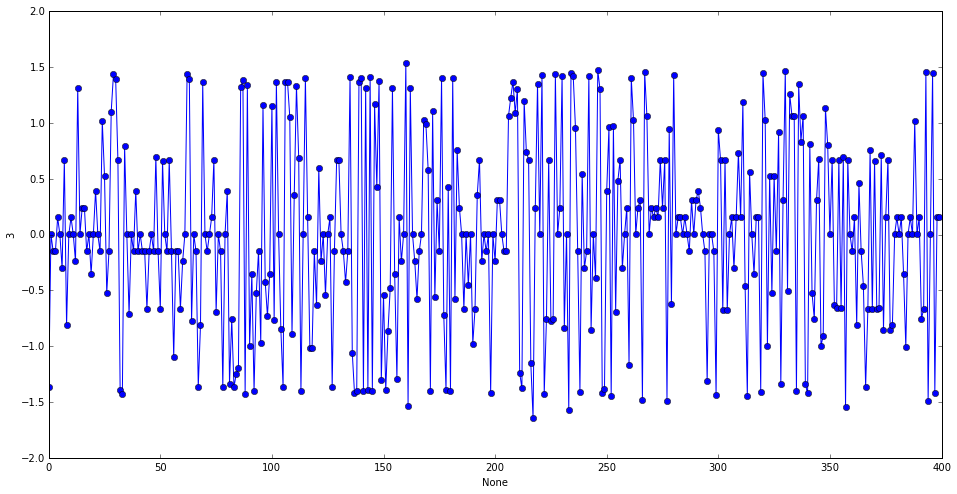

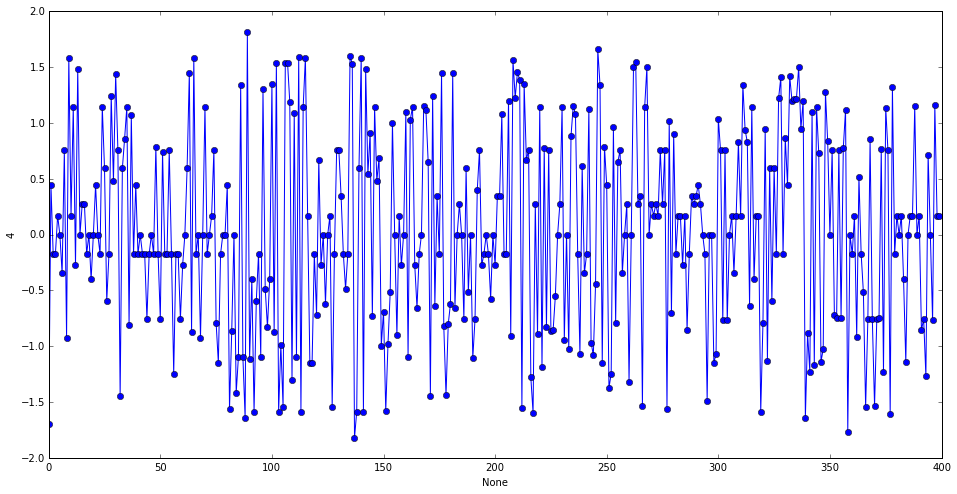

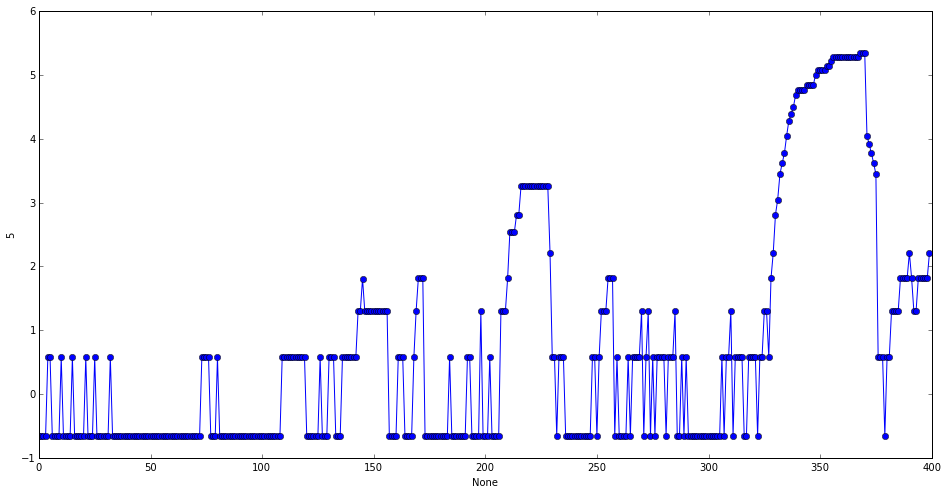

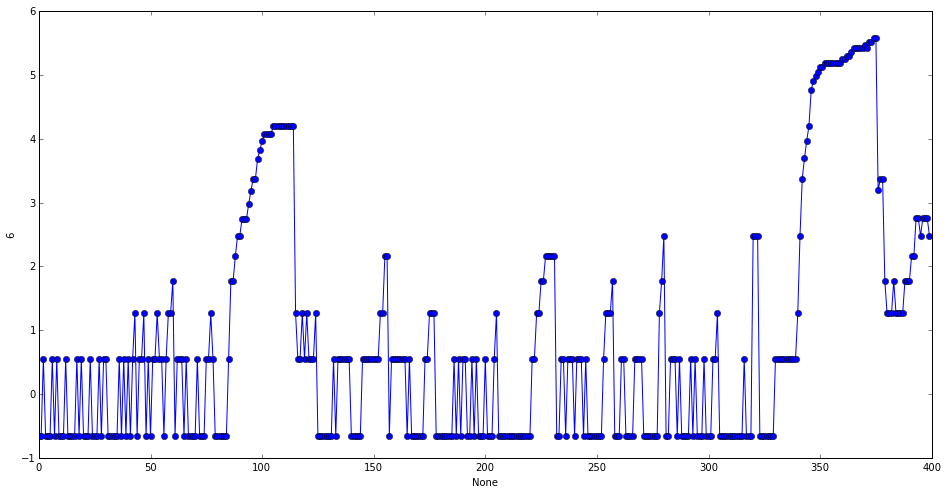

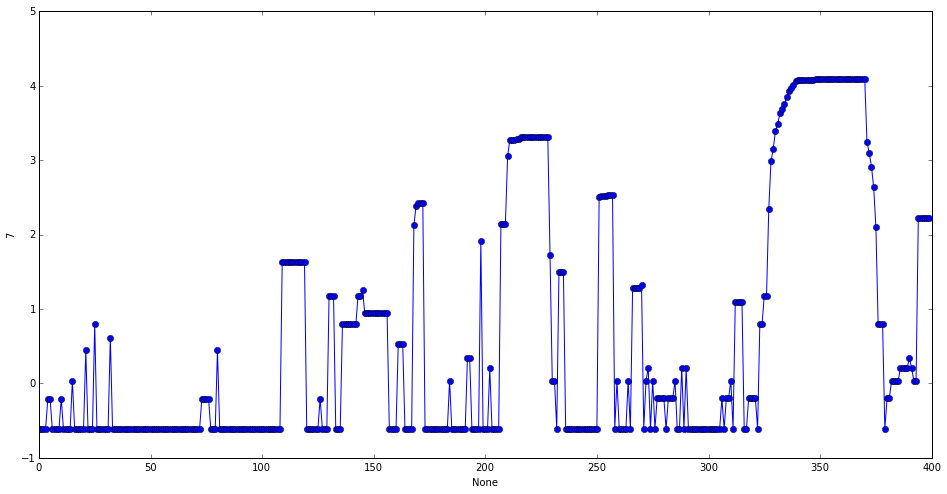

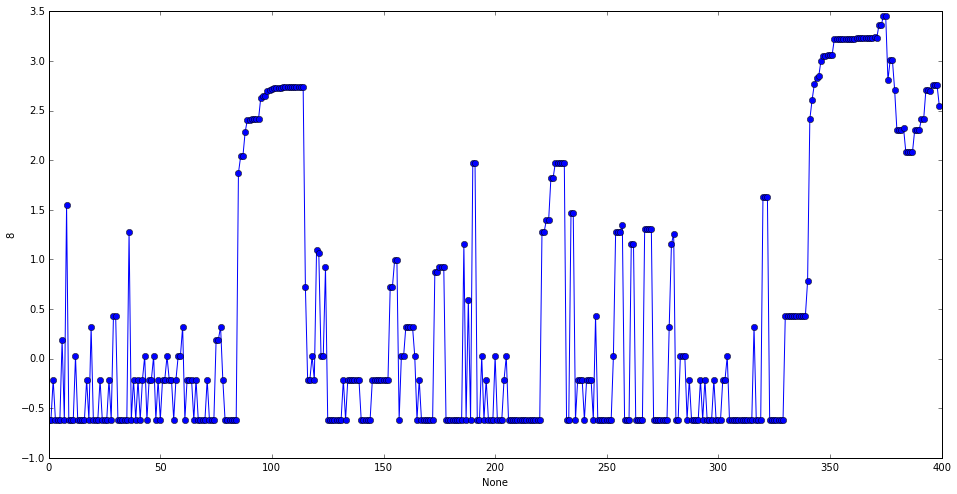

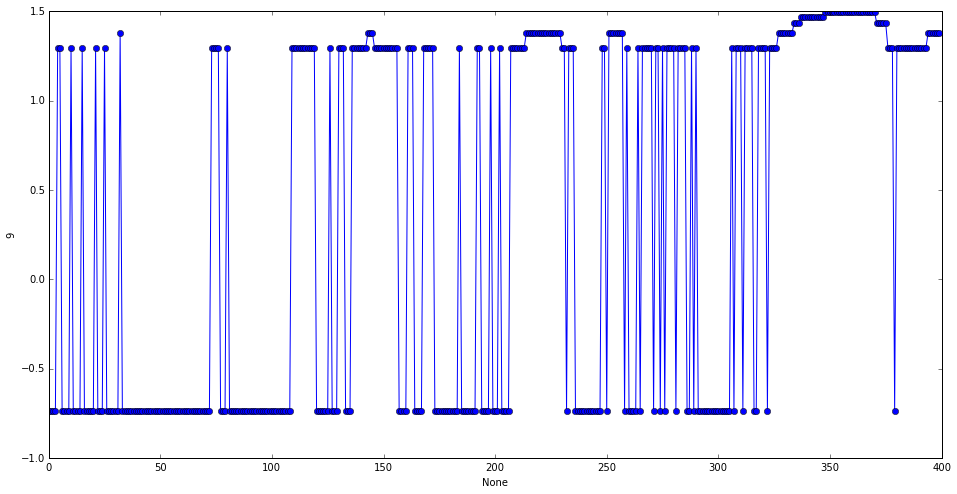

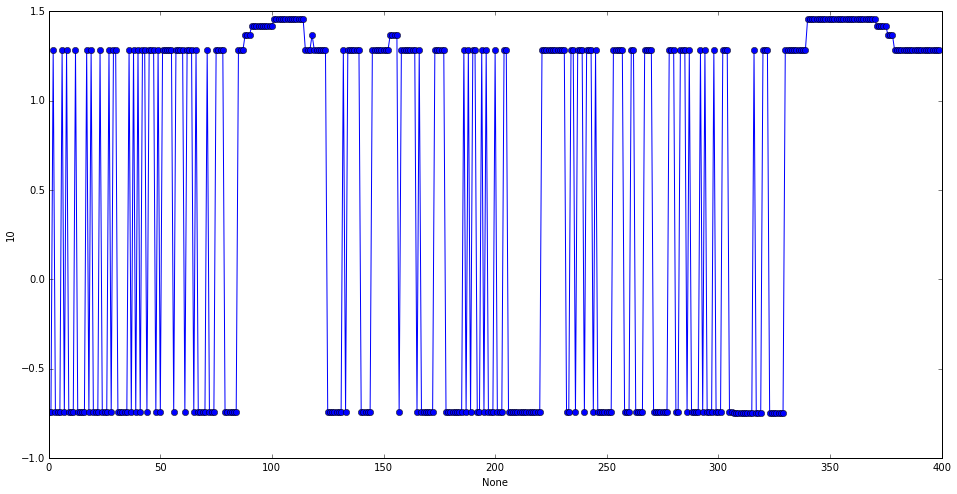

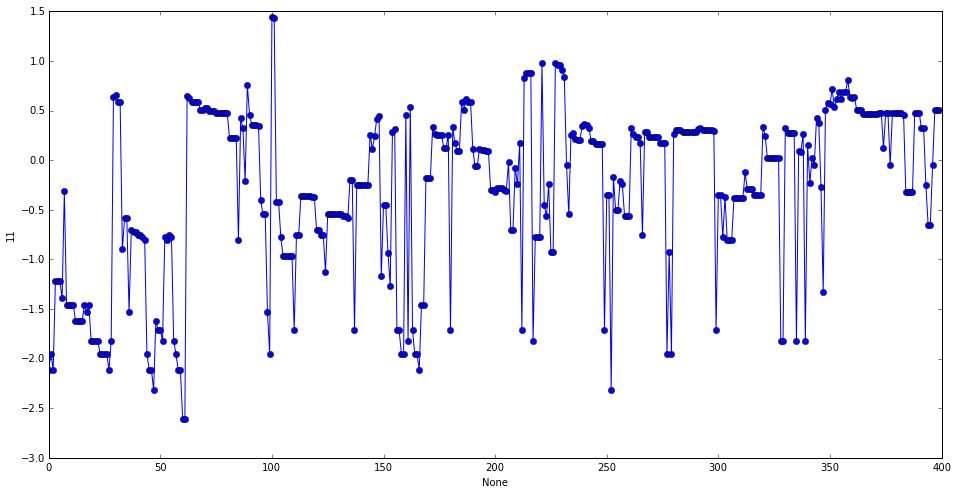

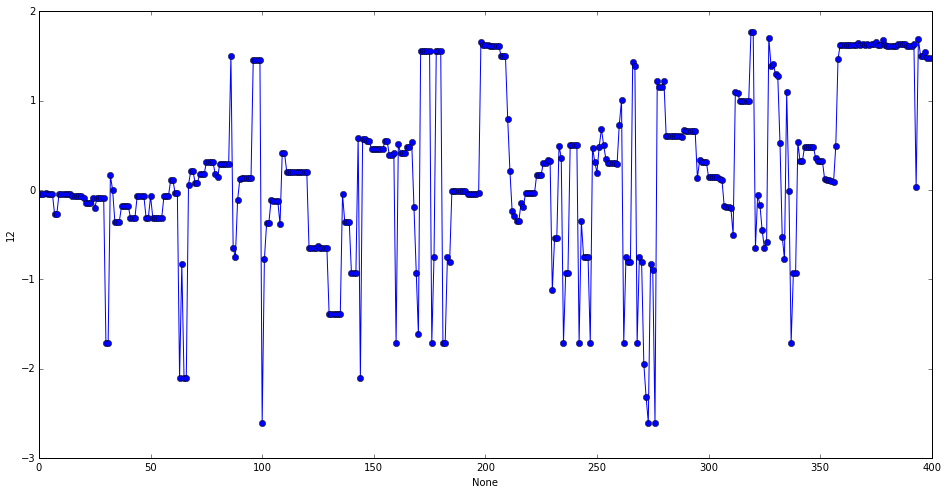

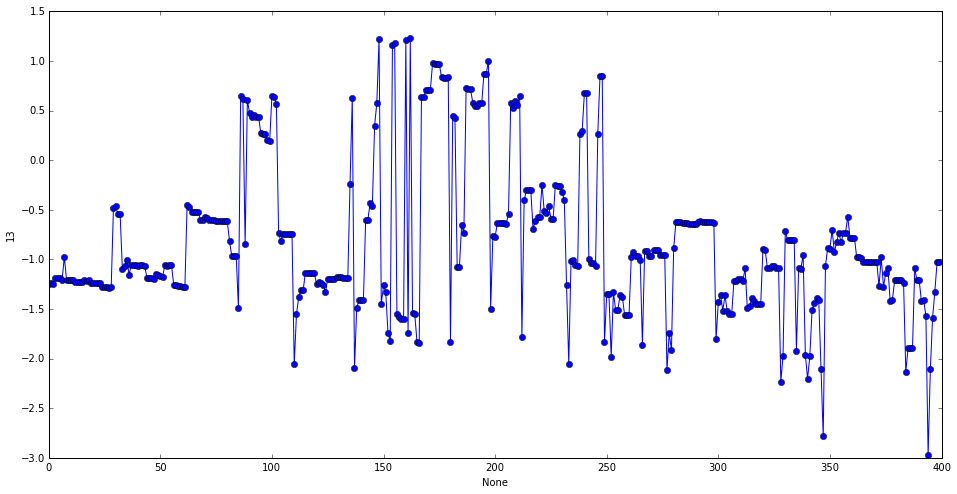

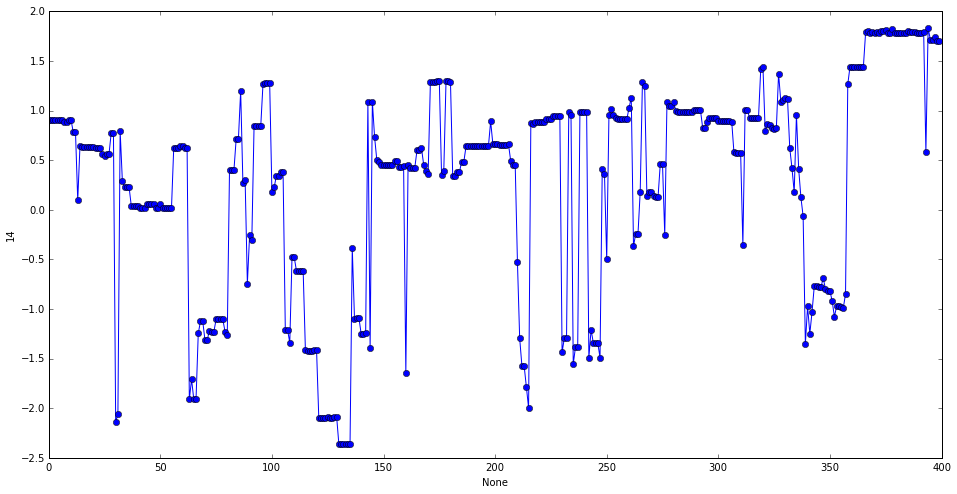

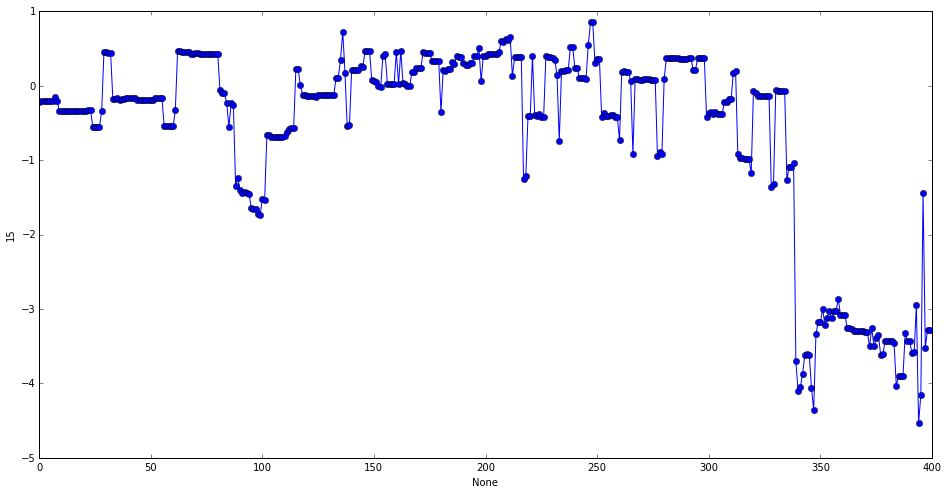

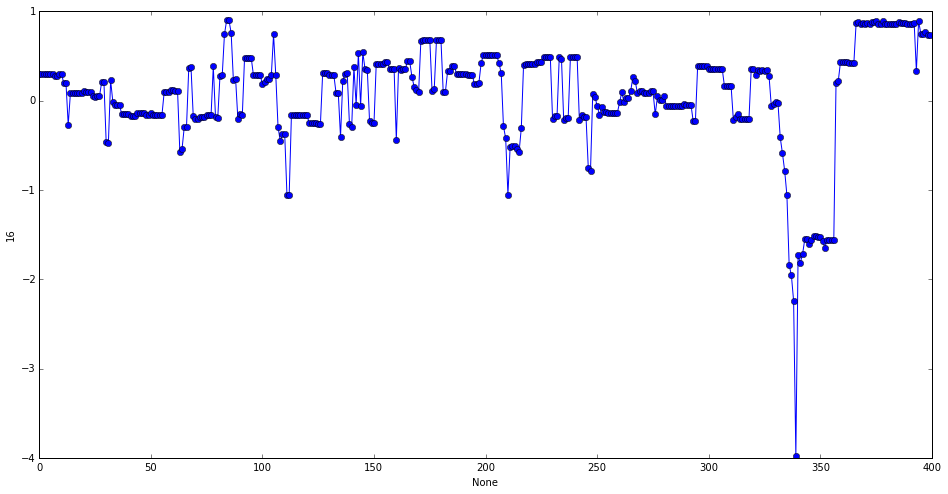

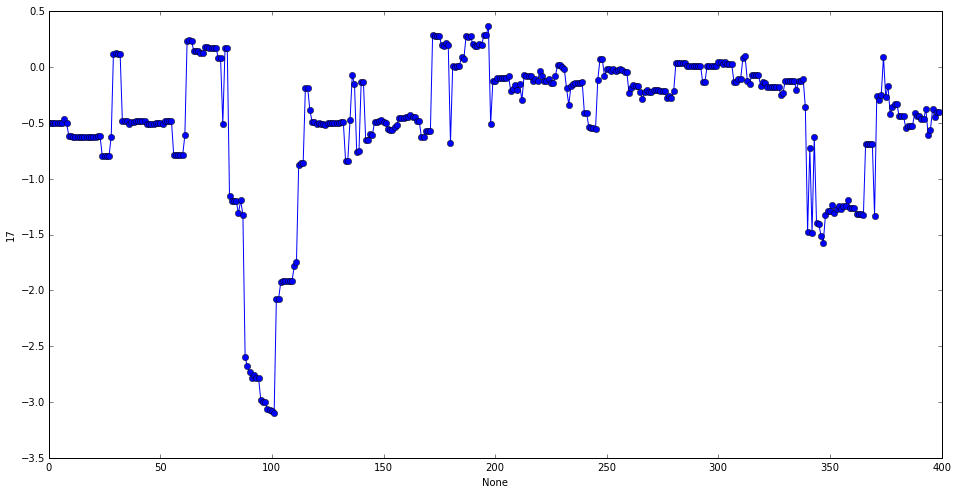

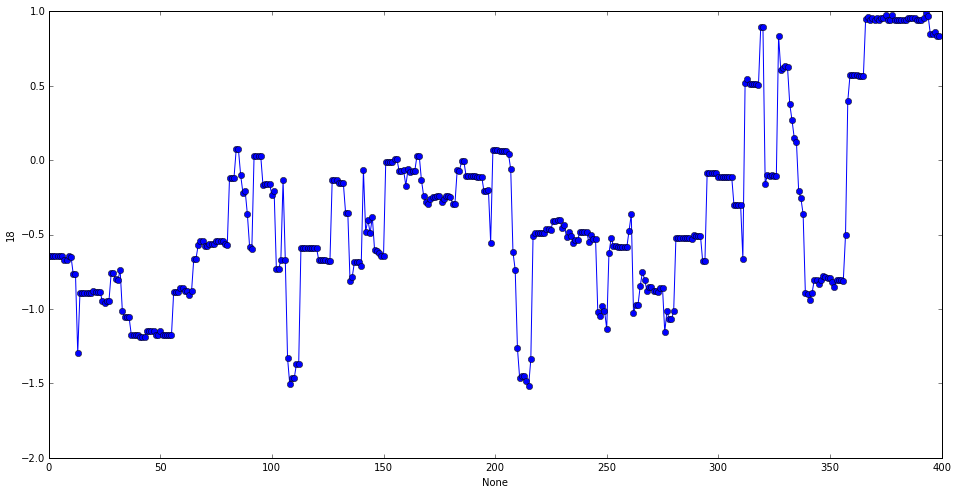

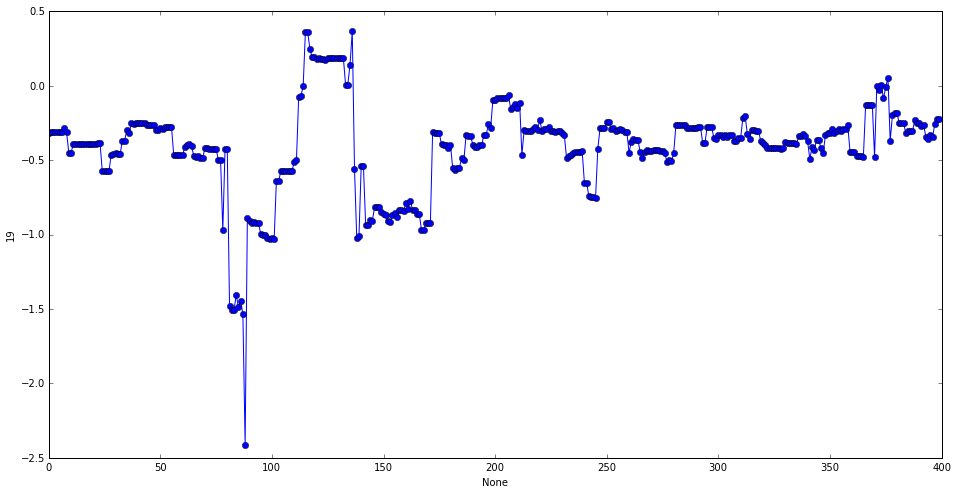

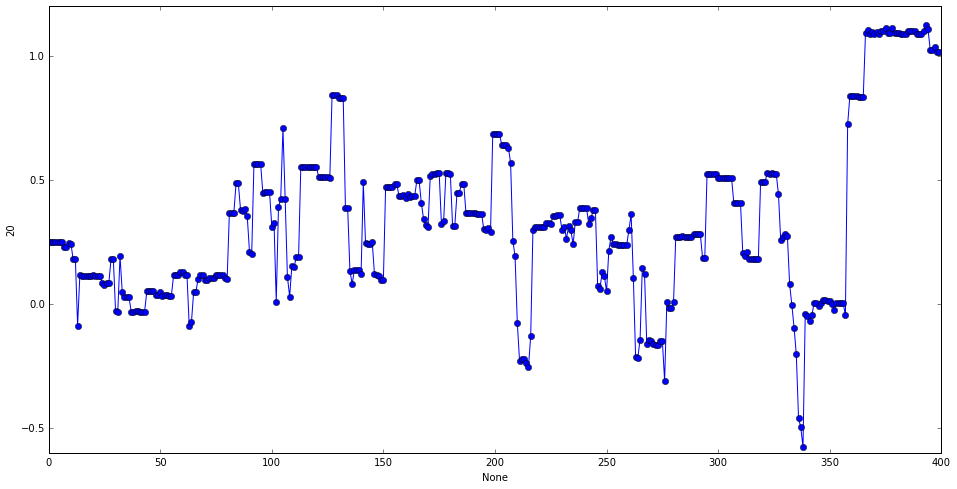

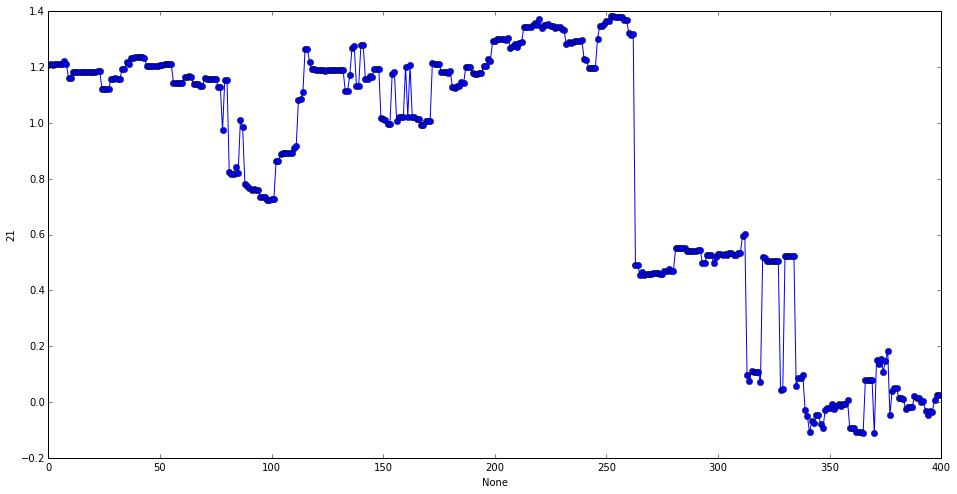

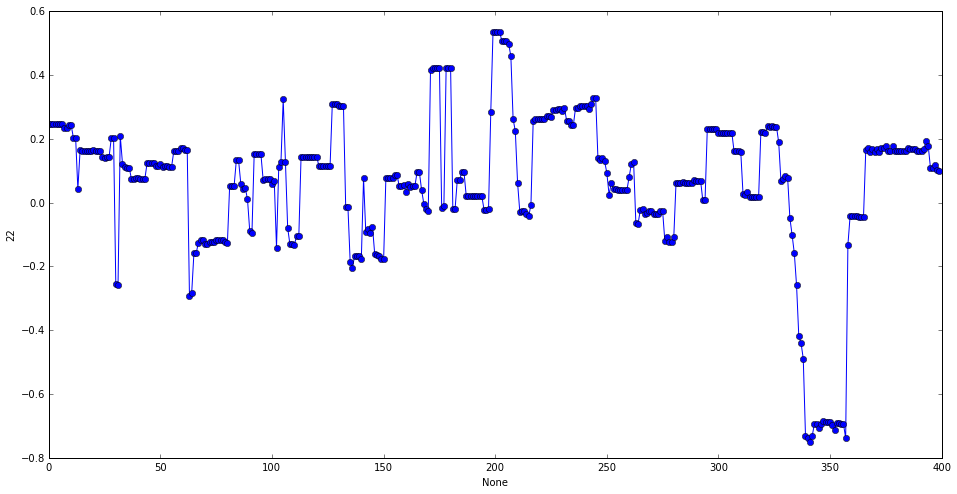

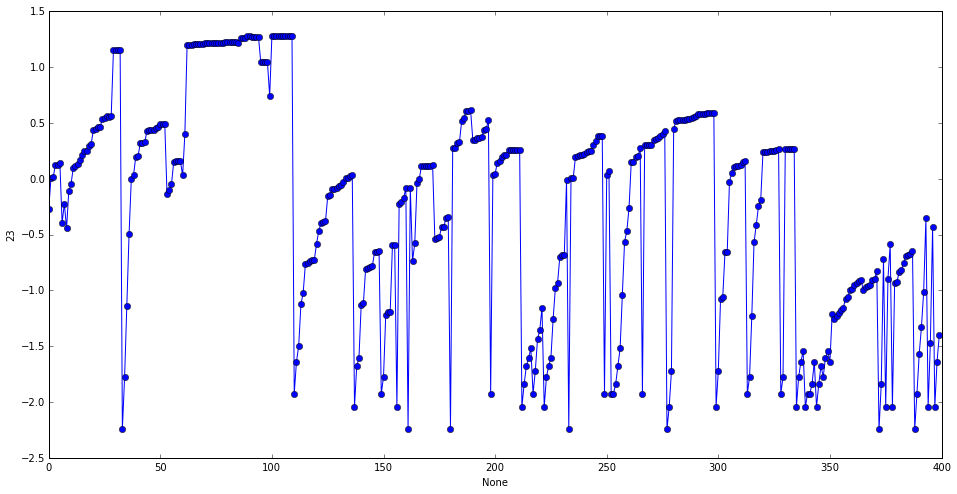

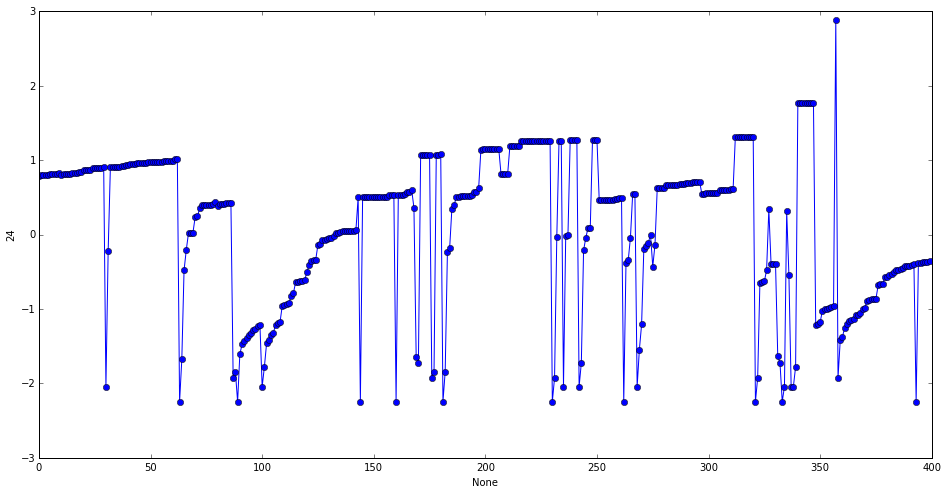

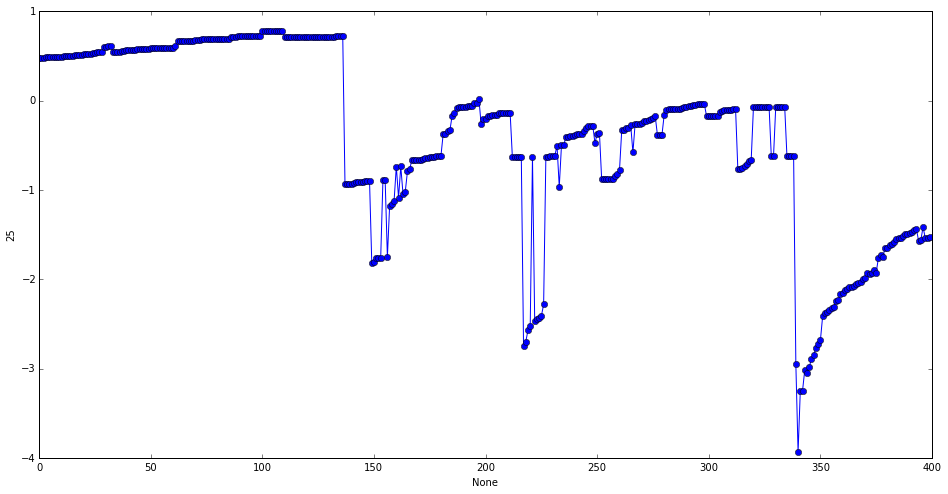

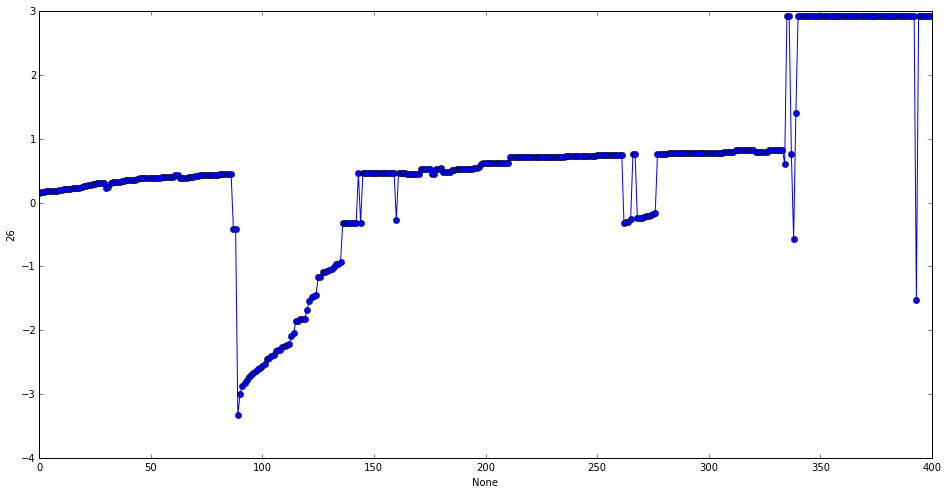

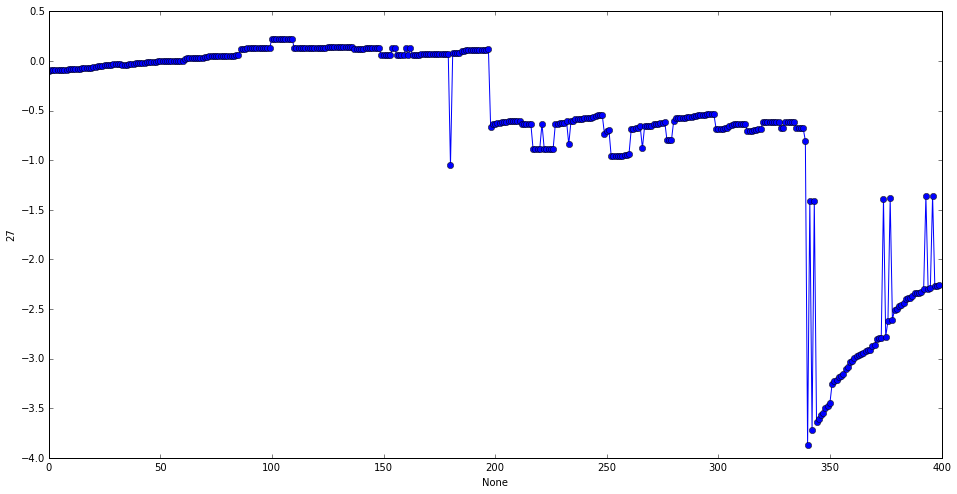

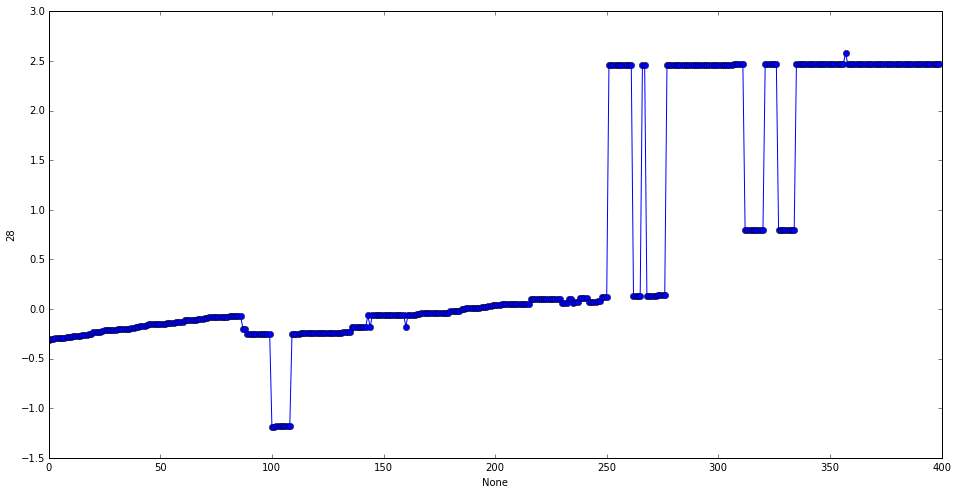

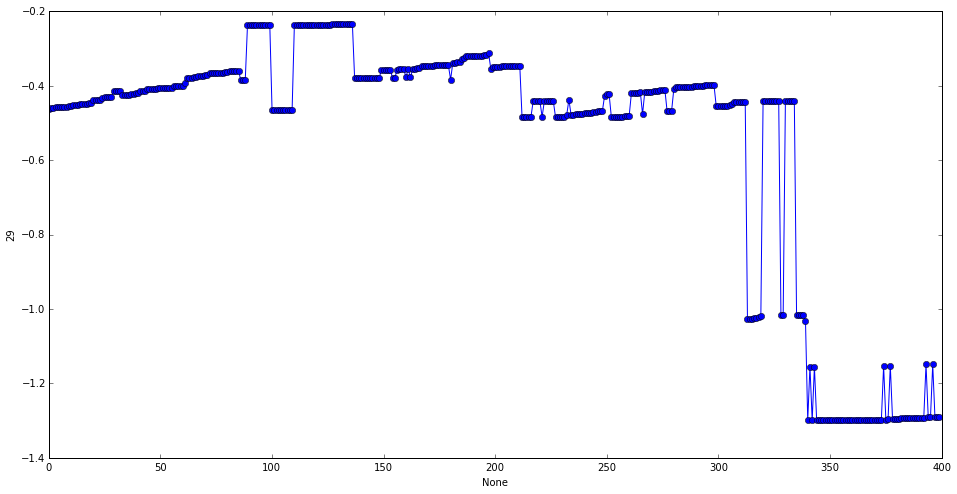

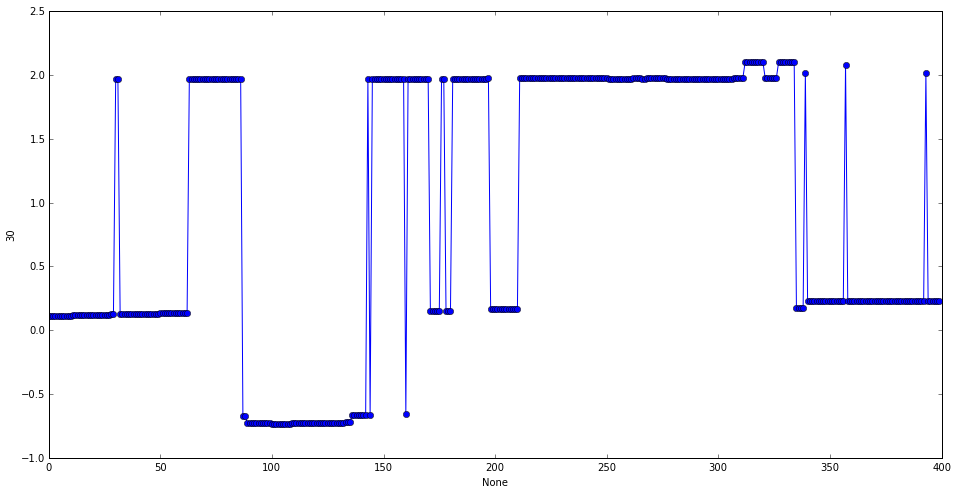

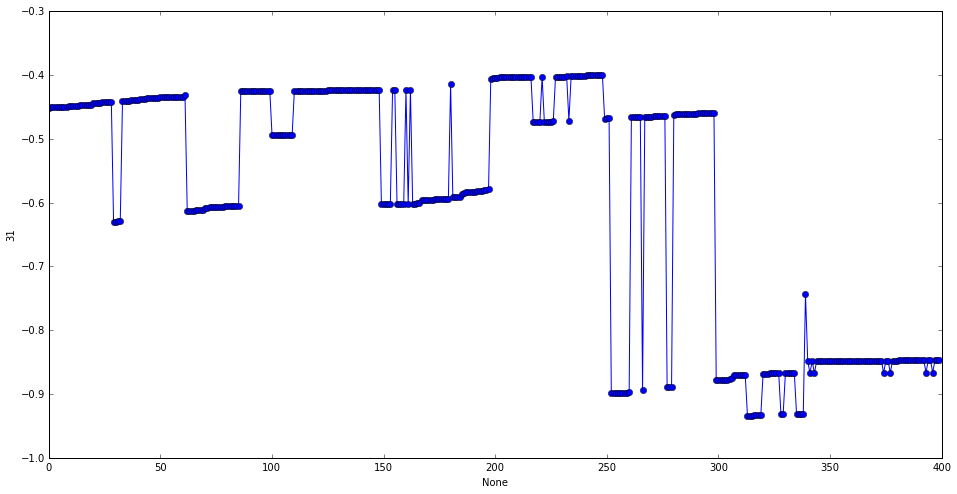

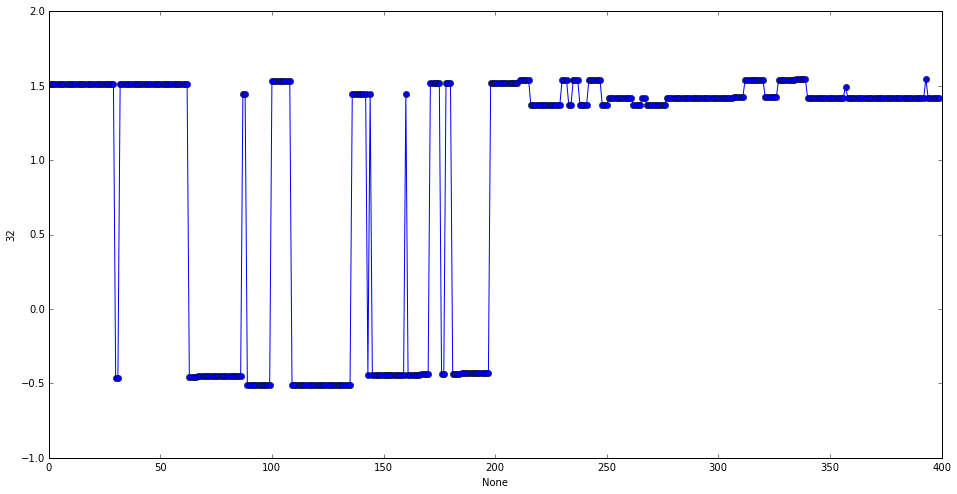

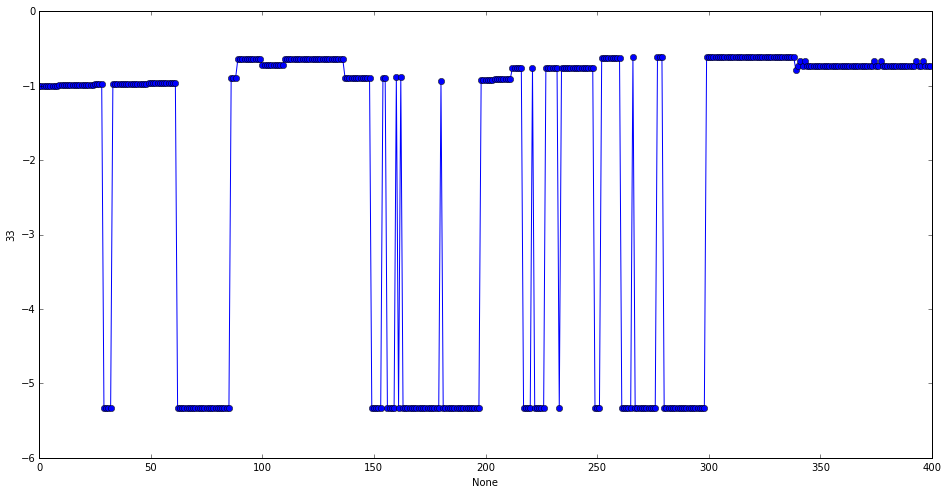

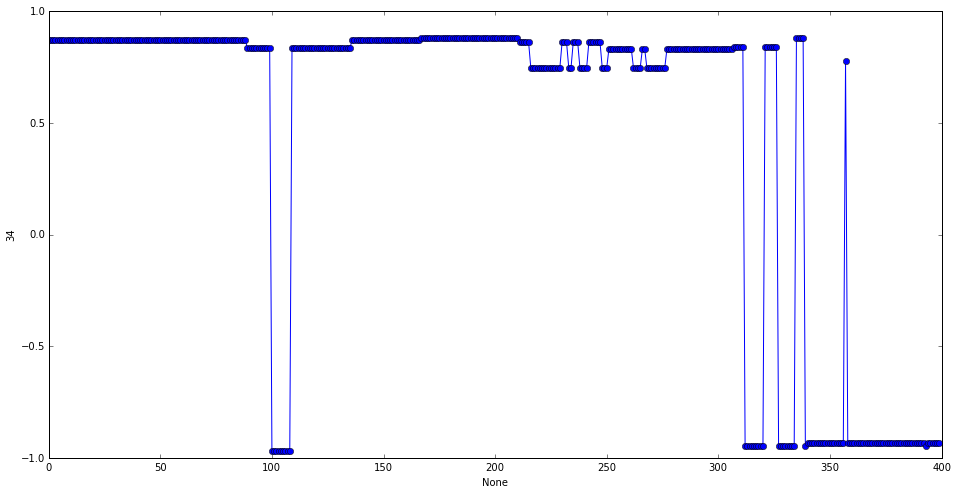

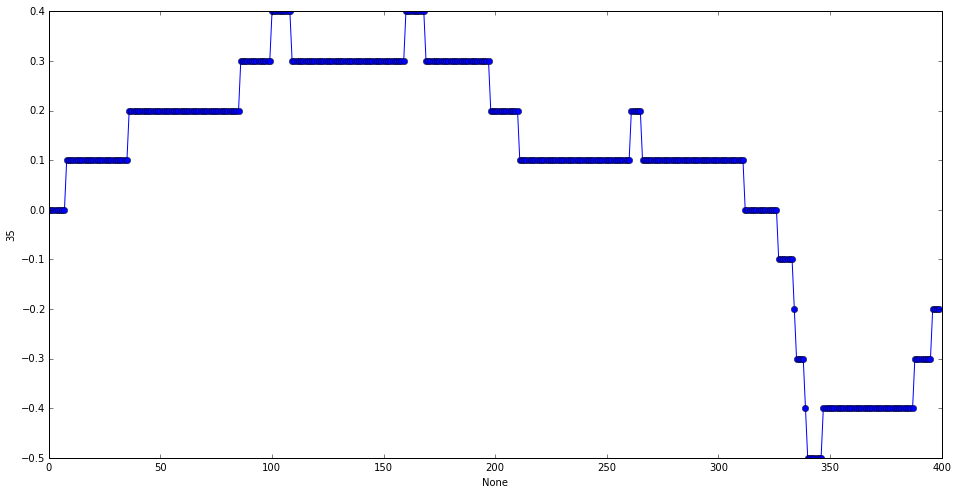

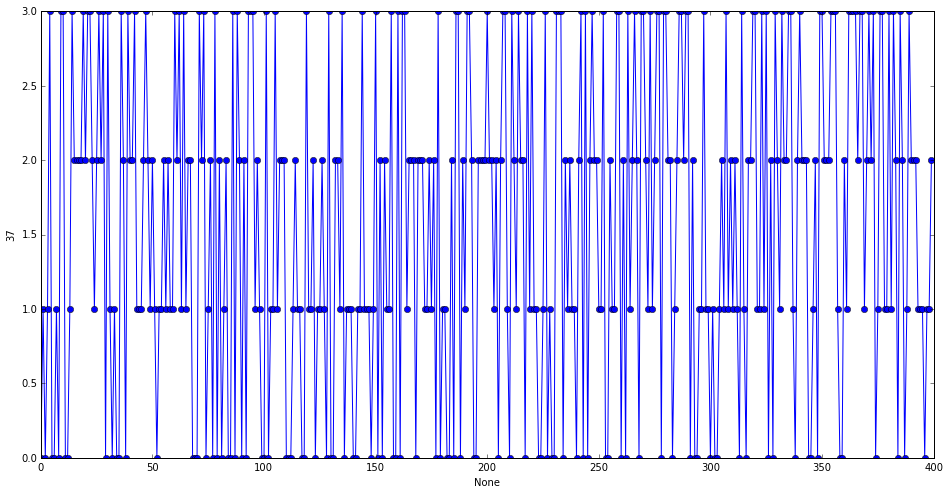

In [24]:
for_plot = test[:400]
    
for col in for_plot.columns:
    plotc(for_plot.index, for_plot[col], [])
    plt.show()

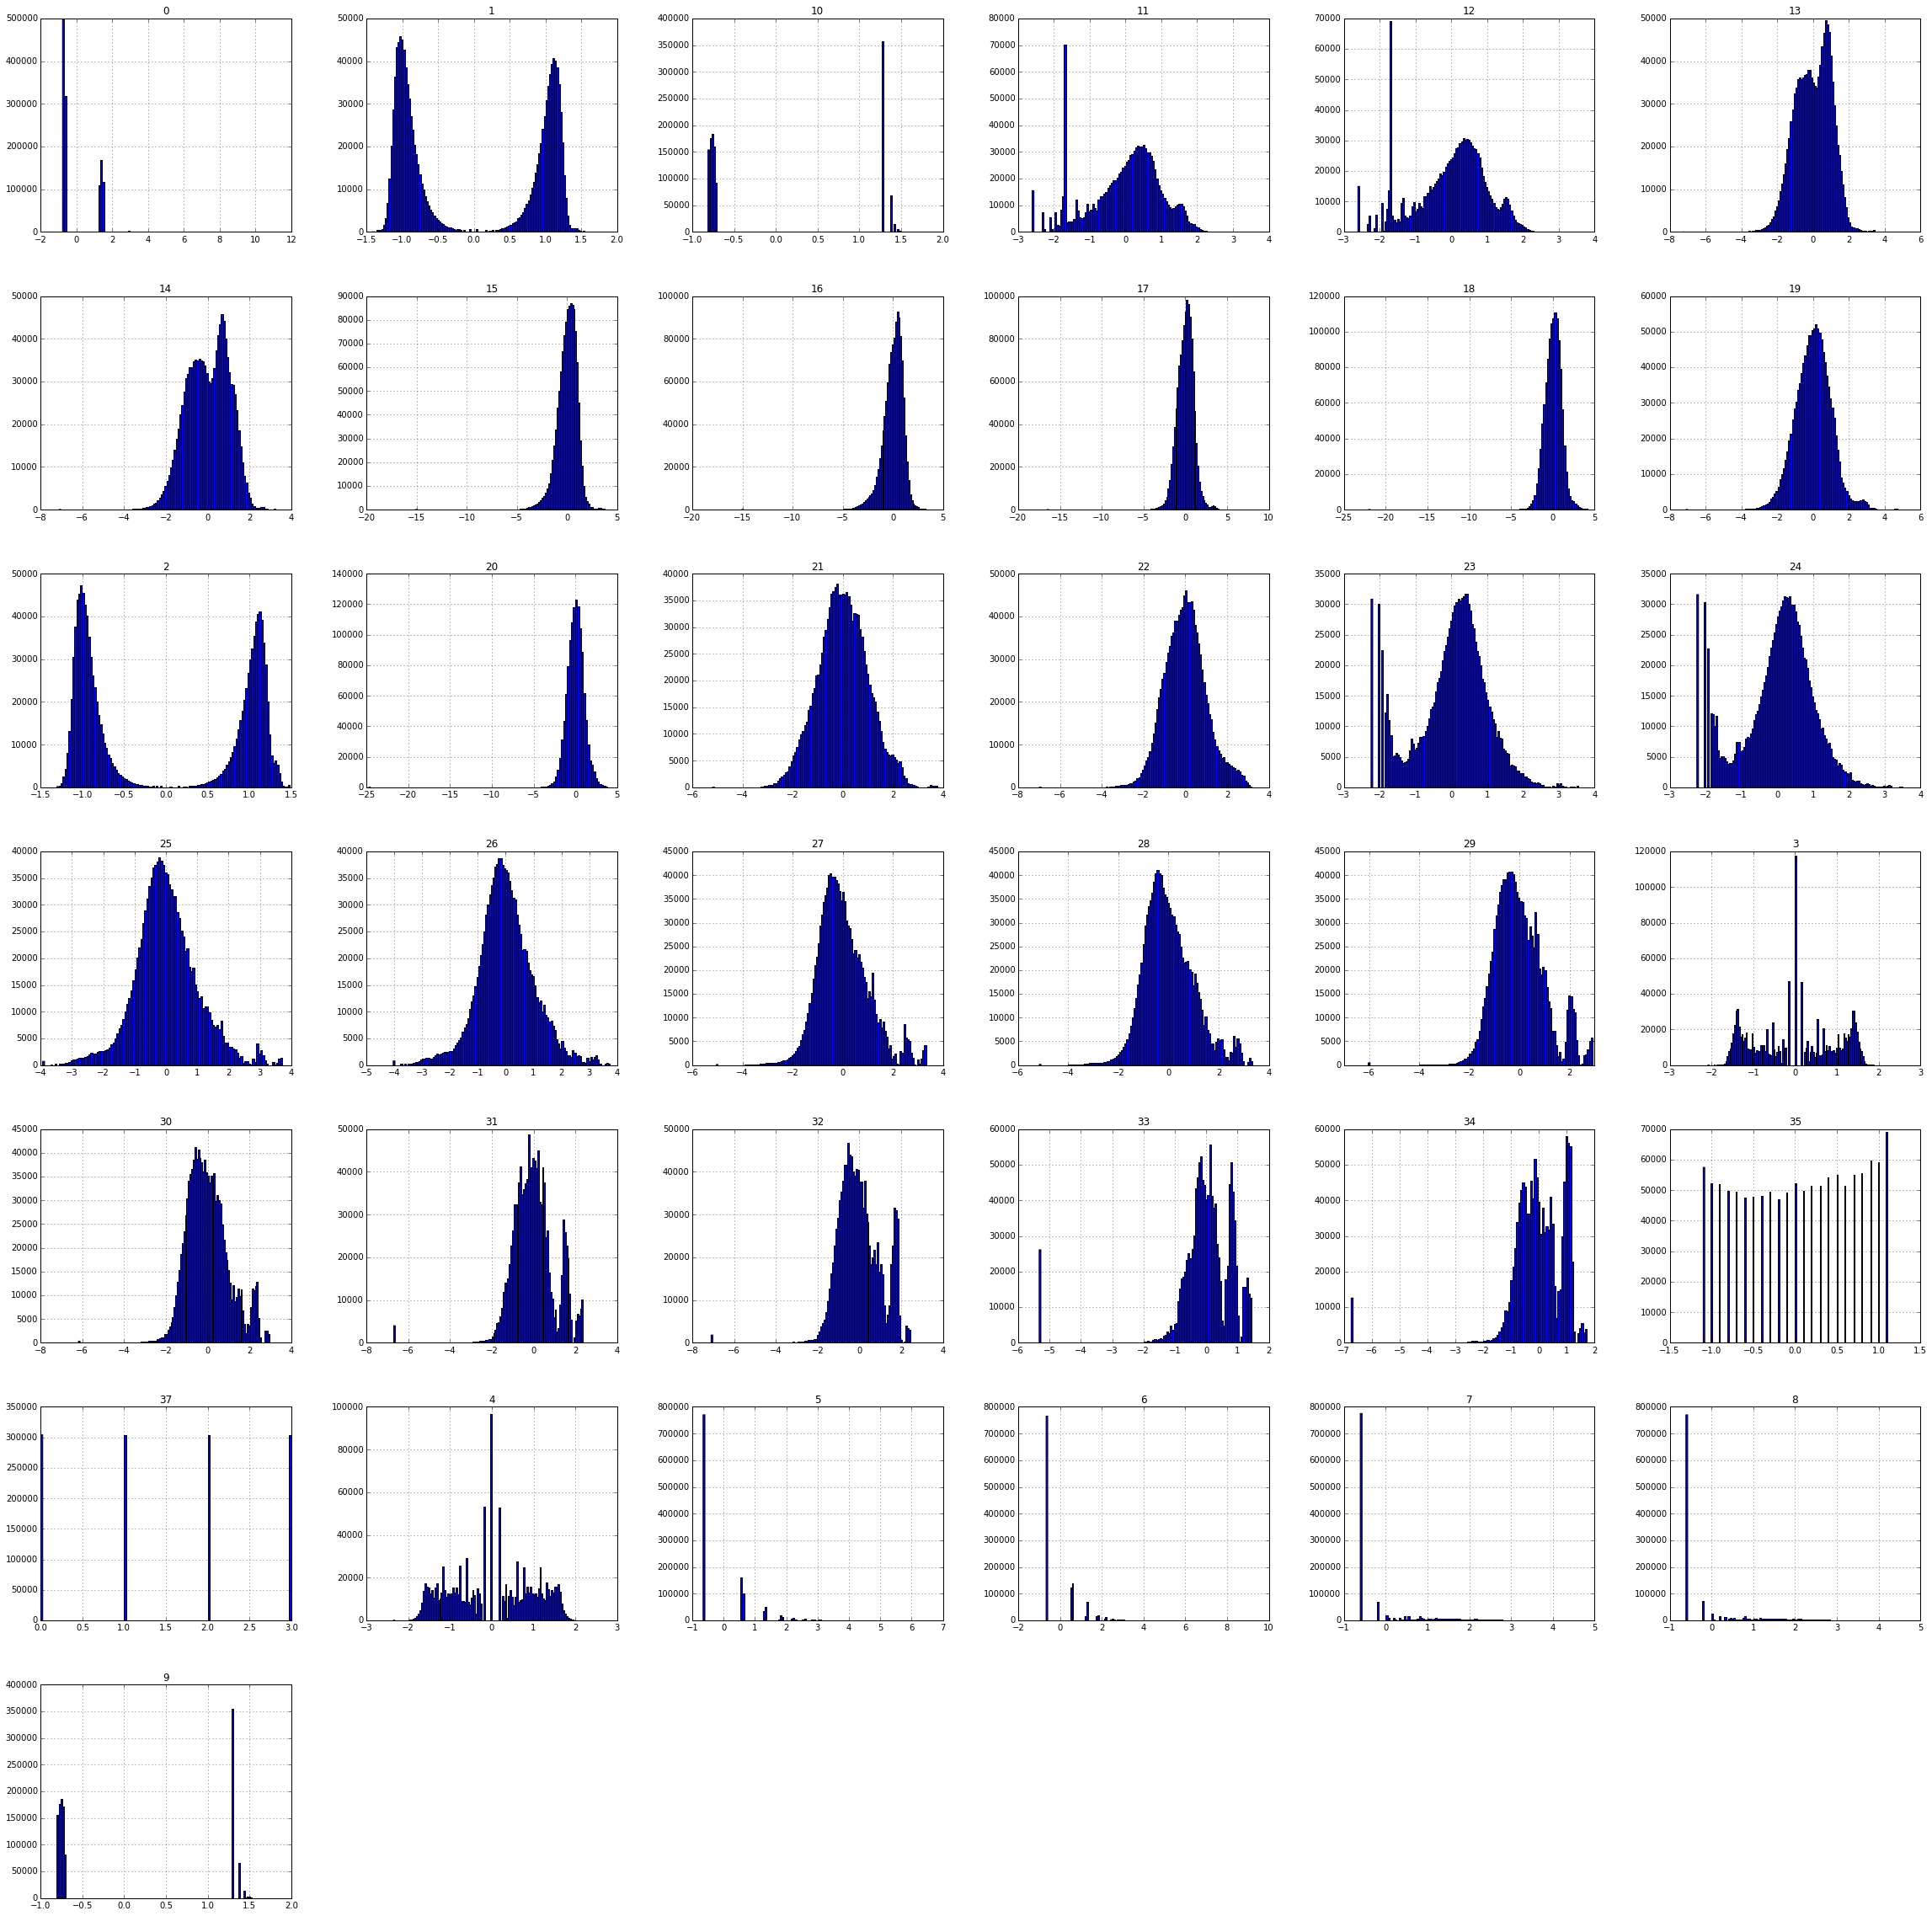

In [11]:
test.hist(figsize=(40,40),bins=120)
plt.show()

In [2]:
x_train = pd.read_excel('data/84_v1.xlsx')

x_test = pd.read_excel('data/new Data Sodexo.xlsx')
# add test columns names like train
x_test['nb_affiliates_in_range_10'] = x_test['nb_affiliates_in_range_10km']
x_test['nb_equiped_in_range_10'] = x_test['nb_equiped_in_range_10km']
x_test['nb_equiped_in_range_5'] = x_test['nb_equiped_in_range_5km']
x_test['nb_equiped_in_range_15'] = x_test['nb_equiped_in_range_15km']
x_test['nb_affiliates_in_range_5'] = x_test['nb_affiliates_in_range_5km']
x_test['nb_affiliates_in_range_15'] = x_test['nb_affiliates_in_range_15km']

In [3]:
#x_train.describe()
#x_train.info()
x_train.ix[:0,:50]

,siret,score_cs_fr,capital_social,ca_annee_n,ca_annee_n1,resultat_net_annee_n,resultat_net_annee_n1,rentabilite_nette_n,effectif_value,total_groupe_eco,...,nb_affiliates_in_range_5,nb_affiliates_in_range_15,department,region,forme_juridique,prive_public,code_naf,division_naf,is_filiale,success
0,708075700052,35,100000,4079877,3644702,85345,155844,105669,34,1,...,47,468,44,Pays de la Loire,SAS,Privé,2511Z,25,False,1


In [4]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17141 entries, 0 to 17140
Data columns (total 25 columns):
siret                        17141 non-null int64
score_cs_fr                  17141 non-null int64
capital_social               17141 non-null int64
ca_annee_n                   17141 non-null int64
ca_annee_n1                  17141 non-null int64
resultat_net_annee_n         17141 non-null int64
resultat_net_annee_n1        17141 non-null int64
rentabilite_nette_n          17131 non-null float64
effectif_value               17141 non-null int64
total_groupe_eco             17139 non-null float64
nb_etabs                     17133 non-null float64
nb_affiliates_in_range_10    17141 non-null object
nb_equiped_in_range_10       17141 non-null object
nb_equiped_in_range_5        17141 non-null object
nb_equiped_in_range_15       17141 non-null object
nb_affiliates_in_range_5     17141 non-null object
nb_affiliates_in_range_15    17141 non-null object
department                   

In [5]:
###### from sklearn import preprocessing
import hashlib
import unicodedata
from sklearn import preprocessing
from sklearn.preprocessing import Imputer

# logarithm column
def log_column(column):
    return np.log(column + 1)

# convert string columns to numbers
def string2int(s):
    str_s = ""
    if (type(s) == type(u"")):
        str_s = unicodedata.normalize('NFKD', s).encode('ascii','ignore')
    else:
        str_s = str(s)
        
    if (str_s == "NaN" or str_s == "nan" or str_s == "null"):
        return None
    return int(hashlib.sha1(str_s).hexdigest(), 16) % (10 ** 10)


def logarithm_columns(dataset, log_columns):
    new_dataset = dataset.copy()
    for col in log_columns:
        new_dataset[col] = log_column(new_dataset[col])
    return new_dataset

# now not using
def fix_string_columns(dataset, string_cols):
    new_dataset = dataset.copy()
    #train = pd.get_dummies(train, columns=string_cols)
    for col in string_cols:
        new_dataset[col] =  new_dataset[col].apply(string2int)
    return new_dataset

def fix_categoric_columns(dataset, categoric_columns):
    new_dataset = dataset.copy()
    
    for col in categoric_columns:
        new_dataset.loc[new_dataset[col].isnull(), col] = 'Missing'
    thr = 0.005
    for col in categoric_columns:
        d = dict(new_dataset[col].value_counts(dropna=False)/len(new_dataset))
        new_dataset[col] = new_dataset[col].apply(lambda x: 'Rare' if d[x] <= thr else x)
    #d = dict(new_dataset['code_naf'].value_counts(dropna=False)/len(new_dataset))
    new_dataset = pd.get_dummies(new_dataset, columns=categoric_columns)
    
    return new_dataset

#replace null and NaN and None values
def replace_null(dataset):
    new_dataset = dataset.copy()
    new_dataset = new_dataset.replace("null", np.nan)
    new_dataset = new_dataset.replace("NaN", np.nan)
    new_dataset = new_dataset.replace("nan", np.nan)
    return new_dataset

def fill_null(dataset):
    new_dataset = dataset.copy()
    new_dataset = new_dataset.fillna(new_dataset.mean())
    return new_dataset

def fix_numeric_features(dataset, numeric_columns):
    full_dataset = dataset.copy()
    norm_dataset = full_dataset[numeric_columns].copy()
    
    norm_dataset = norm_dataset.convert_objects(convert_numeric=True)
        
    norm_dataset = replace_null(norm_dataset)
    
    norm_dataset = fill_null(norm_dataset)
    
    full_dataset[numeric_columns] = norm_dataset
    return full_dataset

def normalize_numeric_features(dataset, numeric_columns):
    full_dataset = dataset.copy()
    norm_dataset = full_dataset[numeric_columns].copy()  
       
    # save columns headers before scale(it drop headers)
    norm_columns = norm_dataset.columns 
    #norm_dataset = pd.DataFrame(preprocessing.normalize(dataset))
    #StandardScaler/MinMaxScaler
    norm_dataset = pd.DataFrame(preprocessing.MinMaxScaler().fit_transform(norm_dataset + 1),
                                columns=numeric_columns, index=full_dataset.index)
    
    # preprocessing drop columns headers
    norm_dataset.columns = norm_columns
    
    full_dataset[numeric_columns] = norm_dataset
    return full_dataset

def fix_column_outlier(dataset, column, num_border, condition, postfix="_strange"):
    new_dataset = dataset.copy()
    if (condition == "<"):
        new_dataset[column + postfix] = (new_dataset[column] < num_border)*1
        new_dataset.loc[new_dataset[column] < num_border, column] = num_border
    elif (condition == ">"):
        new_dataset[column + postfix] = (new_dataset[column] > num_border)*1
        new_dataset.loc[new_dataset[column] > num_border, column] = num_border
    else:
        new_dataset[column + postfix] = (new_dataset[column] == num_border)*1
        new_dataset.loc[new_dataset[column] == num_border, column] = num_border
    return new_dataset

def fix_outliers(dataset):
    new_dataset = dataset.copy()
    
    new_dataset = fix_column_outlier(new_dataset, 'ca_annee_n', 0, "==", "_zero")
    new_dataset = fix_column_outlier(new_dataset, 'ca_annee_n1', 0, "==", "_zero")
    new_dataset = fix_column_outlier(new_dataset, 'resultat_net_annee_n', 0, "==", "_zero")
    new_dataset = fix_column_outlier(new_dataset, 'resultat_net_annee_n1', 0, "==", "_zero")
    new_dataset = fix_column_outlier(new_dataset, 'rentabilite_nette_n', 0, "==", "_zero")
    new_dataset = fix_column_outlier(new_dataset, 'nb_etabs', 0, "==", "_zero")
    new_dataset = fix_column_outlier(new_dataset, 'effectif_value', 0, "==", "_zero")
    
    new_dataset = fix_column_outlier(new_dataset, 'rentabilite_nette_n', -0.4 * 1e7, "<")
    new_dataset = fix_column_outlier(new_dataset, 'resultat_net_annee_n', -0.5 * 1e7, "<")
    new_dataset = fix_column_outlier(new_dataset, 'resultat_net_annee_n1', -0.5 * 1e7, "<")
    new_dataset = fix_column_outlier(new_dataset, 'total_groupe_eco', 5000, ">")
    new_dataset = fix_column_outlier(new_dataset, 'effectif_value', 55, ">")
    
    # company may have 0 offices?
    new_dataset['nb_etabs'] = new_dataset['nb_etabs'].replace(0, 1)
    # company may have 0 employees?
    # new_dataset['effectif_value'] = new_dataset['effectif_value'].replace(0, 1)

    return new_dataset

# mb v normalize
def fix_dataset(dataset, numeric_columns):
    new_dataset = dataset.copy()
    
    new_dataset = new_dataset.drop('siret', axis=1)
    new_dataset = new_dataset.drop('prive_public', axis=1) # always "Privé"
    #new_dataset = new_dataset.drop('client_cr', axis=1)
    
    new_dataset = fix_numeric_features(new_dataset, numeric_columns)
    
    return new_dataset
    
def normalize_dataset(dataset, numeric_columns, categoric_columns, log_columns):
    norm_dataset = dataset.copy()
    
    norm_dataset = logarithm_columns(norm_dataset, log_columns)
    norm_dataset = fix_outliers(norm_dataset)
    norm_dataset = normalize_numeric_features(norm_dataset, numeric_columns)
    norm_dataset = fix_categoric_columns(norm_dataset, categoric_columns)

    return norm_dataset

def merge_datasets(dataset1, dataset2):
    c_d1 = dataset1.copy()
    c_d2 = dataset2.copy()
    last_dataset1_index = c_d1.index[-1:][0]
    c_d2 = c_d2.set_index(c_d2.index + last_dataset1_index + 1)
    merged_dataset = pd.concat([c_d1, c_d2[c_d1.columns]])
    
    return merged_dataset

def separate_datasets(dataset, old_dataset1_index, old_dataset2_index):
    last_dataset1_index = old_dataset1_index[-1:][0]
    dataset2_index = old_dataset2_index + last_dataset1_index + 1
    d2 = dataset.loc[dataset2_index]
    d1 = dataset.drop(dataset2_index)
    
    return [d1, d2]
    
# 4500 null values in nb..range - delete it from train
train = x_train.loc[x_train['nb_equiped_in_range_10'] != 'null']

test = x_test#.loc[x_test["ca_annee_n"].replace(0, np.nan).notnull()]
    
categoric_columns = ["region", "forme_juridique", "code_naf", "is_filiale", "division_naf", "department"]
numeric_columns = x_train.columns - categoric_columns - ["success", "siret", "prive_public"]
log_columns = ["capital_social", "ca_annee_n", "ca_annee_n1", "nb_equiped_in_range_10", "nb_equiped_in_range_15",
                "nb_equiped_in_range_5", "nb_affiliates_in_range_15", "nb_affiliates_in_range_10",
                "nb_affiliates_in_range_5", "nb_etabs", "total_groupe_eco"]

train = fix_dataset(train, numeric_columns)
test = fix_dataset(test, numeric_columns)

print "test  - " + str(len(test))
print "train - " + str(len(train))
train_test = merge_datasets(train, test)
print "train+test - " + str(len(train_test))

train_test = normalize_dataset(train_test, numeric_columns, categoric_columns, log_columns)

# this run after add new features and remove unimportance features
# test = train_test.loc[test.index]
# train = train_test.drop(test.index)
# print "test  - " + str(len(test))
# print "train - " + str(len(train))

train_test

/home/haukot/apps/anaconda/lib/python2.7/site-packages/pandas/core/index.py:1353: FutureWarning: using '-' to provide set differences with Indexes is deprecated, use .difference()
  "use .difference()",FutureWarning)
/home/haukot/apps/anaconda/lib/python2.7/site-packages/pandas/core/common.py:516: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask = arr == x


test  - 358
train - 12622
train+test - 12980


/home/haukot/apps/anaconda/lib/python2.7/site-packages/pandas/core/index.py:805: FutureWarning: scalar indexers for index type Index should be integers and not floating point
  type(self).__name__),FutureWarning)


,score_cs_fr,capital_social,ca_annee_n,ca_annee_n1,resultat_net_annee_n,resultat_net_annee_n1,rentabilite_nette_n,effectif_value,total_groupe_eco,nb_etabs,...,department_83,department_84,department_85,department_91,department_92,department_93,department_94,department_95,department_97,department_Rare
0,0.35,0.674312,0.707818,0.709643,0.142686,0.189781,0.136551,0.618182,0.000000,0.114971,...,0,0,0,0,0,0,0,0,0,0
1,0.70,0.668141,0.755369,0.761940,0.141277,0.191262,0.136655,0.618182,0.041751,0.043579,...,0,0,0,0,0,0,0,0,0,0
2,0.67,0.707088,0.690658,0.697464,0.140397,0.186075,0.133036,0.618182,0.000000,0.114971,...,0,0,0,0,0,0,0,0,0,0
3,0.46,0.769916,0.768843,0.788505,0.183526,0.243671,0.232843,0.654545,0.200370,0.137913,...,0,0,0,0,0,0,0,0,0,0
4,0.51,0.722789,0.674797,0.686430,0.141667,0.188610,0.132189,0.618182,0.094350,0.043579,...,0,0,0,0,0,0,0,0,0,0
5,0.75,0.717767,0.686210,0.693857,0.147940,0.196687,0.133036,0.618182,0.154875,0.335042,...,0,0,0,0,0,0,0,0,0,0
6,0.41,0.523552,0.680291,0.683131,0.139494,0.186403,0.134020,0.454545,0.000000,0.114971,...,0,0,0,0,0,0,0,0,0,0
7,0.19,0.621447,0.645483,0.654589,0.139784,0.184263,0.133665,0.327273,0.041751,0.043579,...,0,0,0,0,0,0,0,0,0,0
8,0.75,0.642408,0.695297,0.696650,0.145613,0.186250,0.143636,0.509091,0.000000,0.114971,...,0,0,0,0,0,0,0,0,0,1
9,0.52,0.616080,0.601070,0.605655,0.140370,0.184163,0.133312,0.127273,0.041751,0.043579,...,0,0,0,0,0,0,0,0,0,0


add new features(also add result kmeans as feature):

In [6]:
new_train = train_test.copy()

new_train["aprox_employer_salary"] = (new_train["ca_annee_n"] - new_train['resultat_net_annee_n'])  / (new_train["effectif_value"] + 1)
new_train["income_grow"] = new_train["ca_annee_n"] - new_train["ca_annee_n1"]
new_train["employ_for_office"] = (new_train["effectif_value"] + 1) / (new_train["nb_etabs"] + 1)
new_train["range_equiped_affiliates_10_5"] = new_train["nb_equiped_in_range_10"] * new_train["nb_affiliates_in_range_5"]
new_train["range_equiped_affiliates_15_5"] = new_train["nb_equiped_in_range_15"] * new_train["nb_affiliates_in_range_5"]
new_train["range_equiped_affiliates_15_10"] = new_train["nb_equiped_in_range_15"] * new_train["nb_affiliates_in_range_10"]
new_train["range_equiped_affiliates_15_15"] = new_train["nb_equiped_in_range_15"] * new_train["nb_affiliates_in_range_15"]
new_train["range_affiliates_affiliates_15_5"] = new_train["nb_affiliates_in_range_5"] * new_train["nb_affiliates_in_range_15"]

new_train["caannee_rentabilite"] = new_train["ca_annee_n"] * new_train["rentabilite_nette_n"]
# WARNING x_train!
n_train = merge_datasets(x_train, x_test).replace('null', np.nan).fillna(train.mean())
for dep in n_train["department"].unique():
    dep_condition = n_train["department"] == dep
    n_train.loc[dep_condition, "equiped_in_department"] = n_train.loc[dep_condition]["nb_equiped_in_range_15"].mean()
    n_train.loc[dep_condition, "affiliates_in_department"] = n_train.loc[dep_condition]["nb_affiliates_in_range_15"].mean()

new_train["equiped_in_department"] = n_train["equiped_in_department"]
new_train["affiliates_in_department"] = n_train["affiliates_in_department"]

new_train = normalize_numeric_features(new_train, new_train.columns)

# add clusters as features
from sklearn.cluster import KMeans

feature_cols = [col for col in new_train.columns if col not in ['success']]
x_new_train = new_train[feature_cols]
k2 = KMeans(n_clusters=2, precompute_distances = True, n_jobs=-1)
k2.fit(x_new_train)
k4 = KMeans(n_clusters=4, precompute_distances = True, n_jobs=-1)
k4.fit(x_new_train)
k12 = KMeans(n_clusters=12, precompute_distances = True, n_jobs=-1)
k12.fit(x_new_train)
k25 = KMeans(n_clusters=25, precompute_distances = True, n_jobs=-1)
k25.fit(x_new_train)
k50 = KMeans(n_clusters=50, precompute_distances = True, n_jobs=-1)
k50.fit(x_new_train)

train_columns = list(x_new_train.columns) + ["k2", "k4", "k12", "k25", "k50"]
# test_columns
#test  = np.hstack((test,  k12.predict(test)[None].T,  k4.predict(test)[None].T,  k2.predict(test)[None].T))
new_train_arr = np.hstack((x_new_train, k2.predict(x_new_train)[None].T,
                           k4.predict(x_new_train)[None].T, k12.predict(x_new_train)[None].T,
                           k25.predict(x_new_train)[None].T, k50.predict(x_new_train)[None].T))
new_train = pd.DataFrame(new_train_arr, columns=train_columns, index=train_test.index)
new_train["success"] = train_test["success"]

new_train = fix_categoric_columns(new_train, ["k2", "k4", "k12", "k25", "k50"])

feature_cols = [col for col in new_train.columns if col not in ['success']]
# not final X
X_train = new_train[feature_cols]
y_train_pd = new_train['success']

print "success"

success


In [7]:
train.columns

Index([              u'score_cs_fr',            u'capital_social',
                      u'ca_annee_n',               u'ca_annee_n1',
            u'resultat_net_annee_n',     u'resultat_net_annee_n1',
             u'rentabilite_nette_n',            u'effectif_value',
                u'total_groupe_eco',                  u'nb_etabs',
       u'nb_affiliates_in_range_10',    u'nb_equiped_in_range_10',
           u'nb_equiped_in_range_5',    u'nb_equiped_in_range_15',
        u'nb_affiliates_in_range_5', u'nb_affiliates_in_range_15',
                      u'department',                    u'region',
                 u'forme_juridique',                  u'code_naf',
                    u'division_naf',                u'is_filiale',
                         u'success'],
      dtype='object')

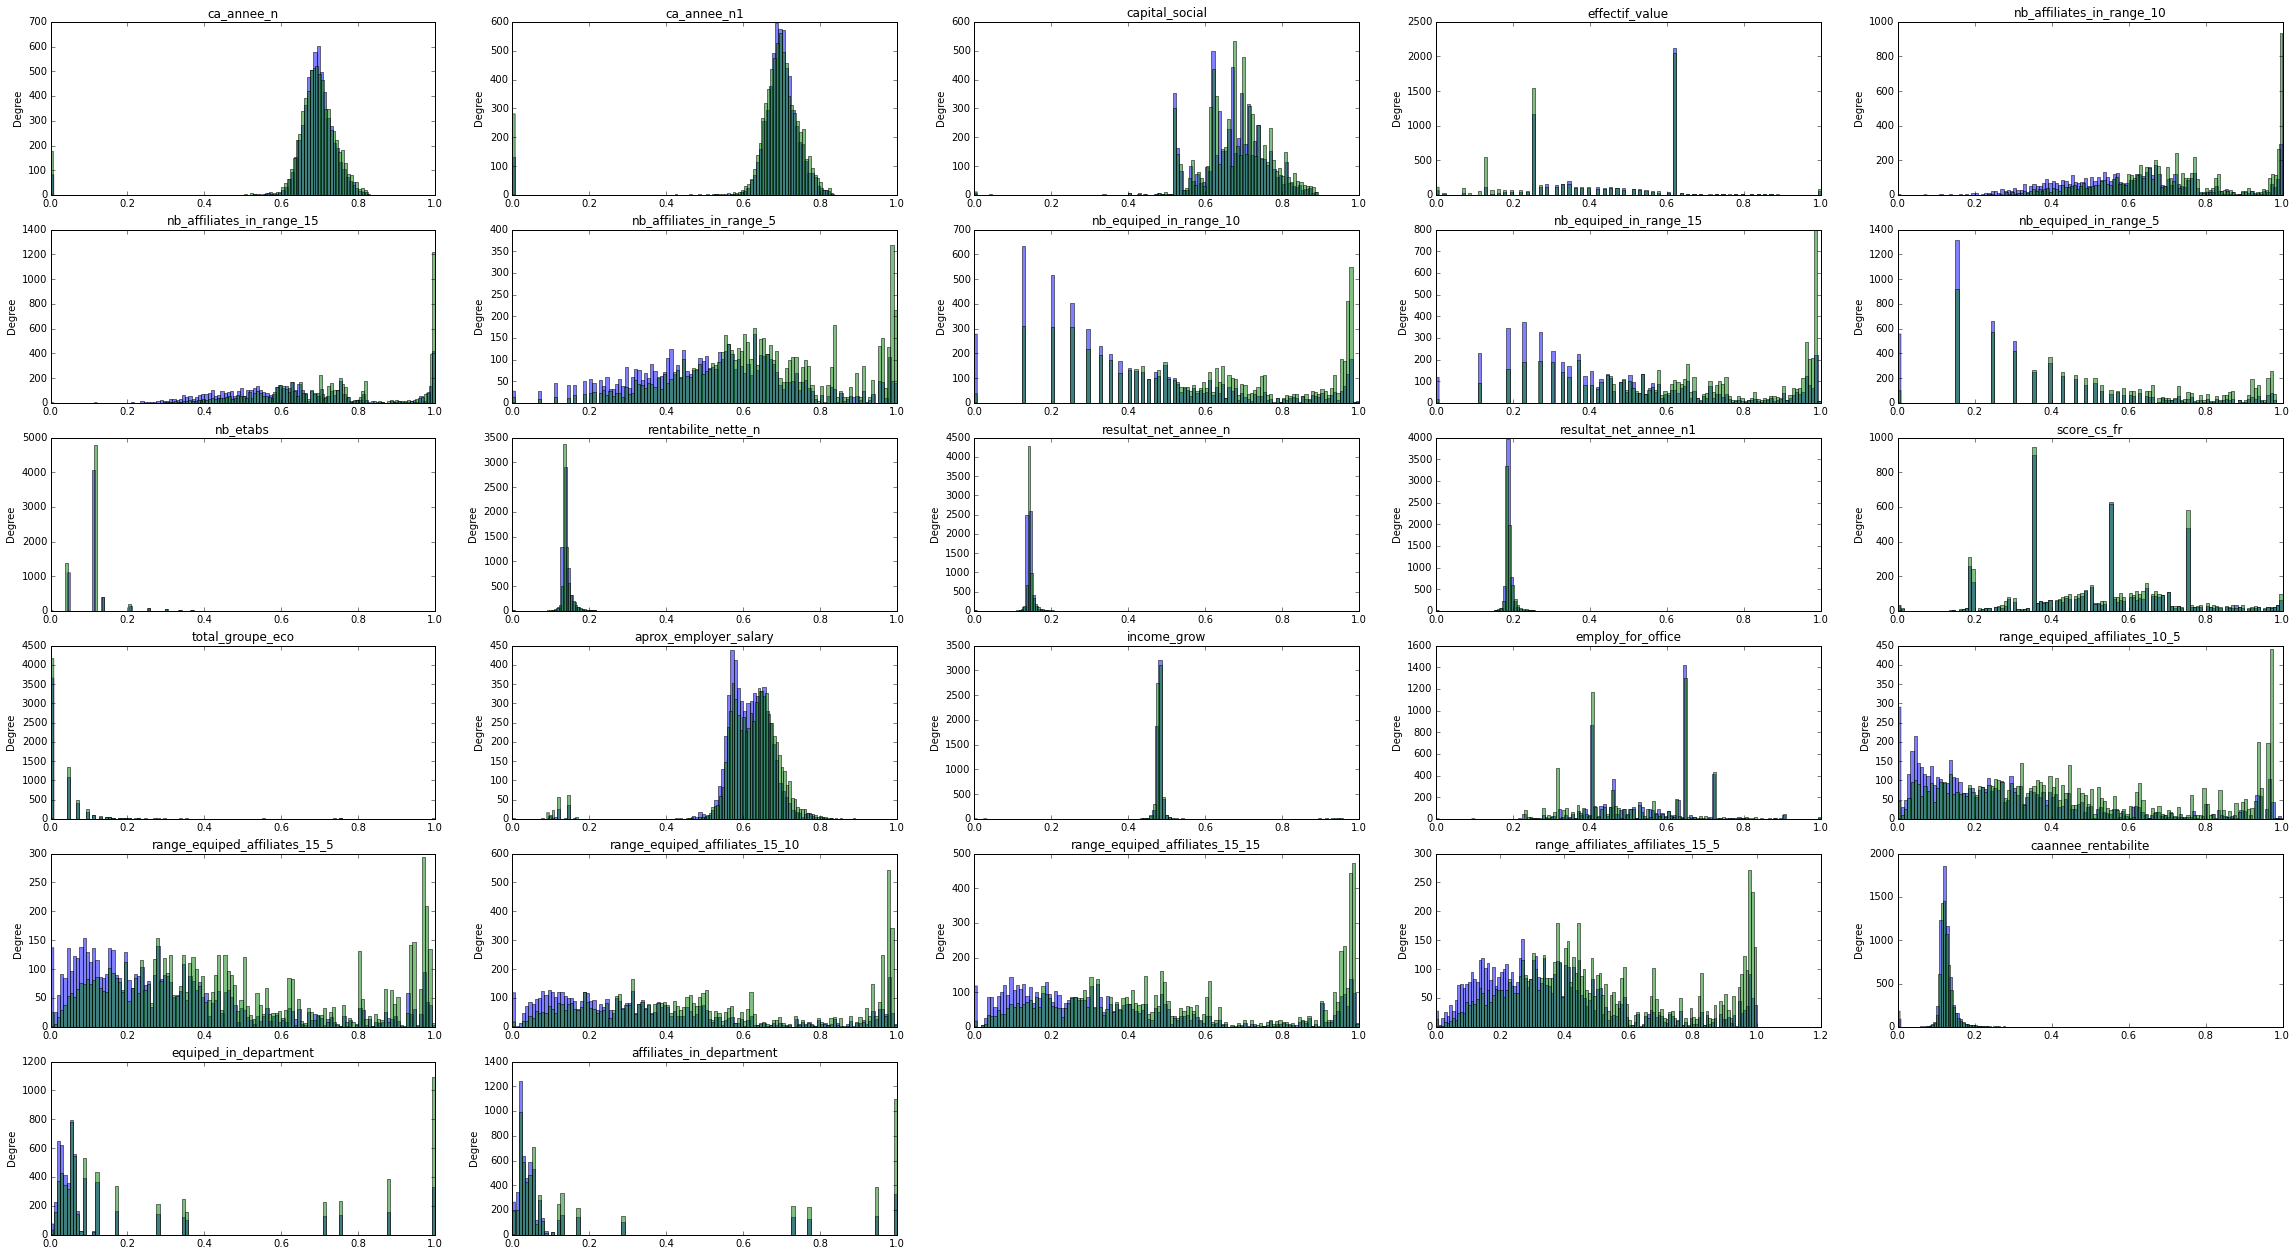

In [8]:
# train_test.ix[:,:1].hist(figsize=(40,40),bins=120)
# plt.show()
import math

grouped = new_train.groupby('success')
fig = plt.figure(figsize=(40,100))
i = 0

all_numeric_columns = list(numeric_columns.values) + ["aprox_employer_salary", "income_grow", "employ_for_office",
                                        "range_equiped_affiliates_10_5", "range_equiped_affiliates_15_5",
                                        "range_equiped_affiliates_15_10", "range_equiped_affiliates_15_15",
                                        "range_affiliates_affiliates_15_5", "caannee_rentabilite",
                                        "equiped_in_department", "affiliates_in_department"]
plot_row_line = len(all_numeric_columns)
for col in all_numeric_columns:
    #print col
    gr = grouped[col]
    i = i + 1
    in_row = int(math.sqrt(plot_row_line))
    ax = fig.add_subplot(plot_row_line, in_row, i)
    for k, v in gr:
        plt.title(col)
        v.plot(ax=ax, kind='hist', alpha=.5, label=k, bins=120)

In [9]:
from IPython.display import Image
from itertools import combinations
from matplotlib.colors import ListedColormap

def plotc(c1,c2,label_values):
    fig = plt.figure(figsize=(16,8))
    sel = np.array(list(label_values))
    
    plt.scatter(c1, c2, c=sel, s=100, cmap=ListedColormap(['red', '#0000FF']))
    plt.xlabel(c1.name)
    plt.ylabel(c2.name)
    
def plot_combinations(dataset, columns, label_values):
    cols = [i for i in combinations(columns, 2)]

    # Example graphs of one variable from another
    for col in cols:
        plotc(dataset[col[0]], dataset[col[1]], label_values)
        plt.show()
   

/home/haukot/apps/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


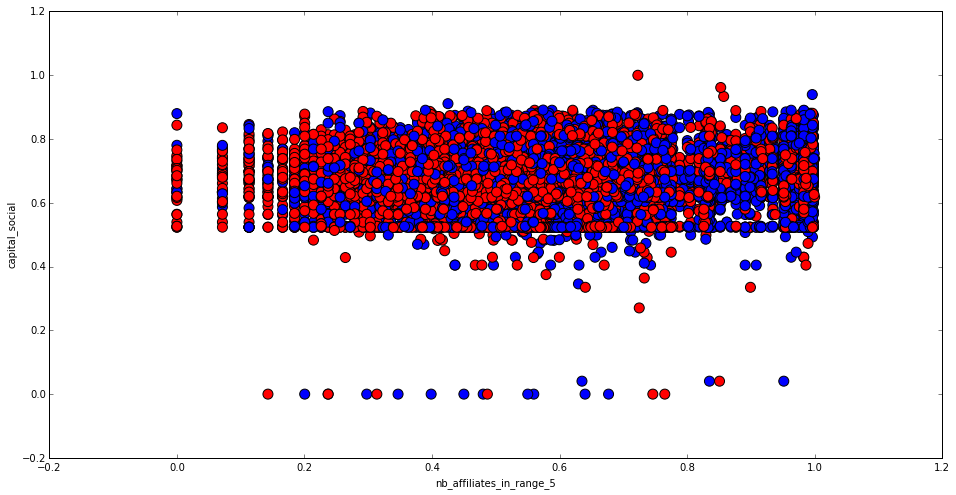

In [10]:

# nb_affiliates_in_range_5 x nb_affiliates_in_range_15
plotc(train_test["nb_affiliates_in_range_5"], train_test["capital_social"], train_test["success"].values)

#len(temp_cond.loc[temp_cond["nb_affiliates_in_range_5"] / temp_cond["divnaf_rentabilite"] > 50])

In [11]:
# temp_cond = X_train_cond.copy()
# temp_cond["success"] = y_train_cond
# # nb_affiliates_in_range_5 x nb_affiliates_in_range_15
# # employ_for_office x nb_affiliates_in_range_5
# columns = ["nb_equiped_in_range_5", "nb_equiped_in_range_15", "nb_affiliates_in_range_5", "nb_affiliates_in_range_15", "nb_affiliates_in_range_10"]
# #plot_combinations(temp_cond, columns, temp_cond["success"].values)

# plt.show()

In [12]:
# feature importance plotting
# from https://github.com/dmlc/xgboost/blob/master/python-package/xgboost/plotting.py
# importance is [(k,v)]
def plot_importance(importance, ax=None, height=0.2,
                    xlim=None, ylim=None, title='Feature importance',
                    xlabel='F score', ylabel='Features',
                    grid=True, **kwargs):
    tuples = [(k, importance[k]) for k in importance]
    tuples = sorted(tuples, key=lambda x: x[1])
    labels, values = zip(*tuples)

    if ax is None:
        _, ax = plt.subplots(1, 1)

    ylocs = np.arange(len(values))
    ax.barh(ylocs, values, align='center', height=height, **kwargs)

    for x, y in zip(values, ylocs):
        ax.text(x + 1, y, x, va='center')

    ax.set_yticks(ylocs)
    ax.set_yticklabels(labels)

    if xlim is not None:
        if not isinstance(xlim, tuple) or len(xlim) != 2:
            raise ValueError('xlim must be a tuple of 2 elements')
    else:
        xlim = (0, max(values) * 1.1)
    ax.set_xlim(xlim)

    if ylim is not None:
        if not isinstance(ylim, tuple) or len(ylim) != 2:
            raise ValueError('ylim must be a tuple of 2 elements')
    else:
        ylim = (-1, len(importance))
    ax.set_ylim(ylim)

    if title is not None:
        ax.set_title(title)
    if xlabel is not None:
        ax.set_xlabel(xlabel)
    if ylabel is not None:
        ax.set_ylabel(ylabel)
    ax.grid(grid)
    return ax

153

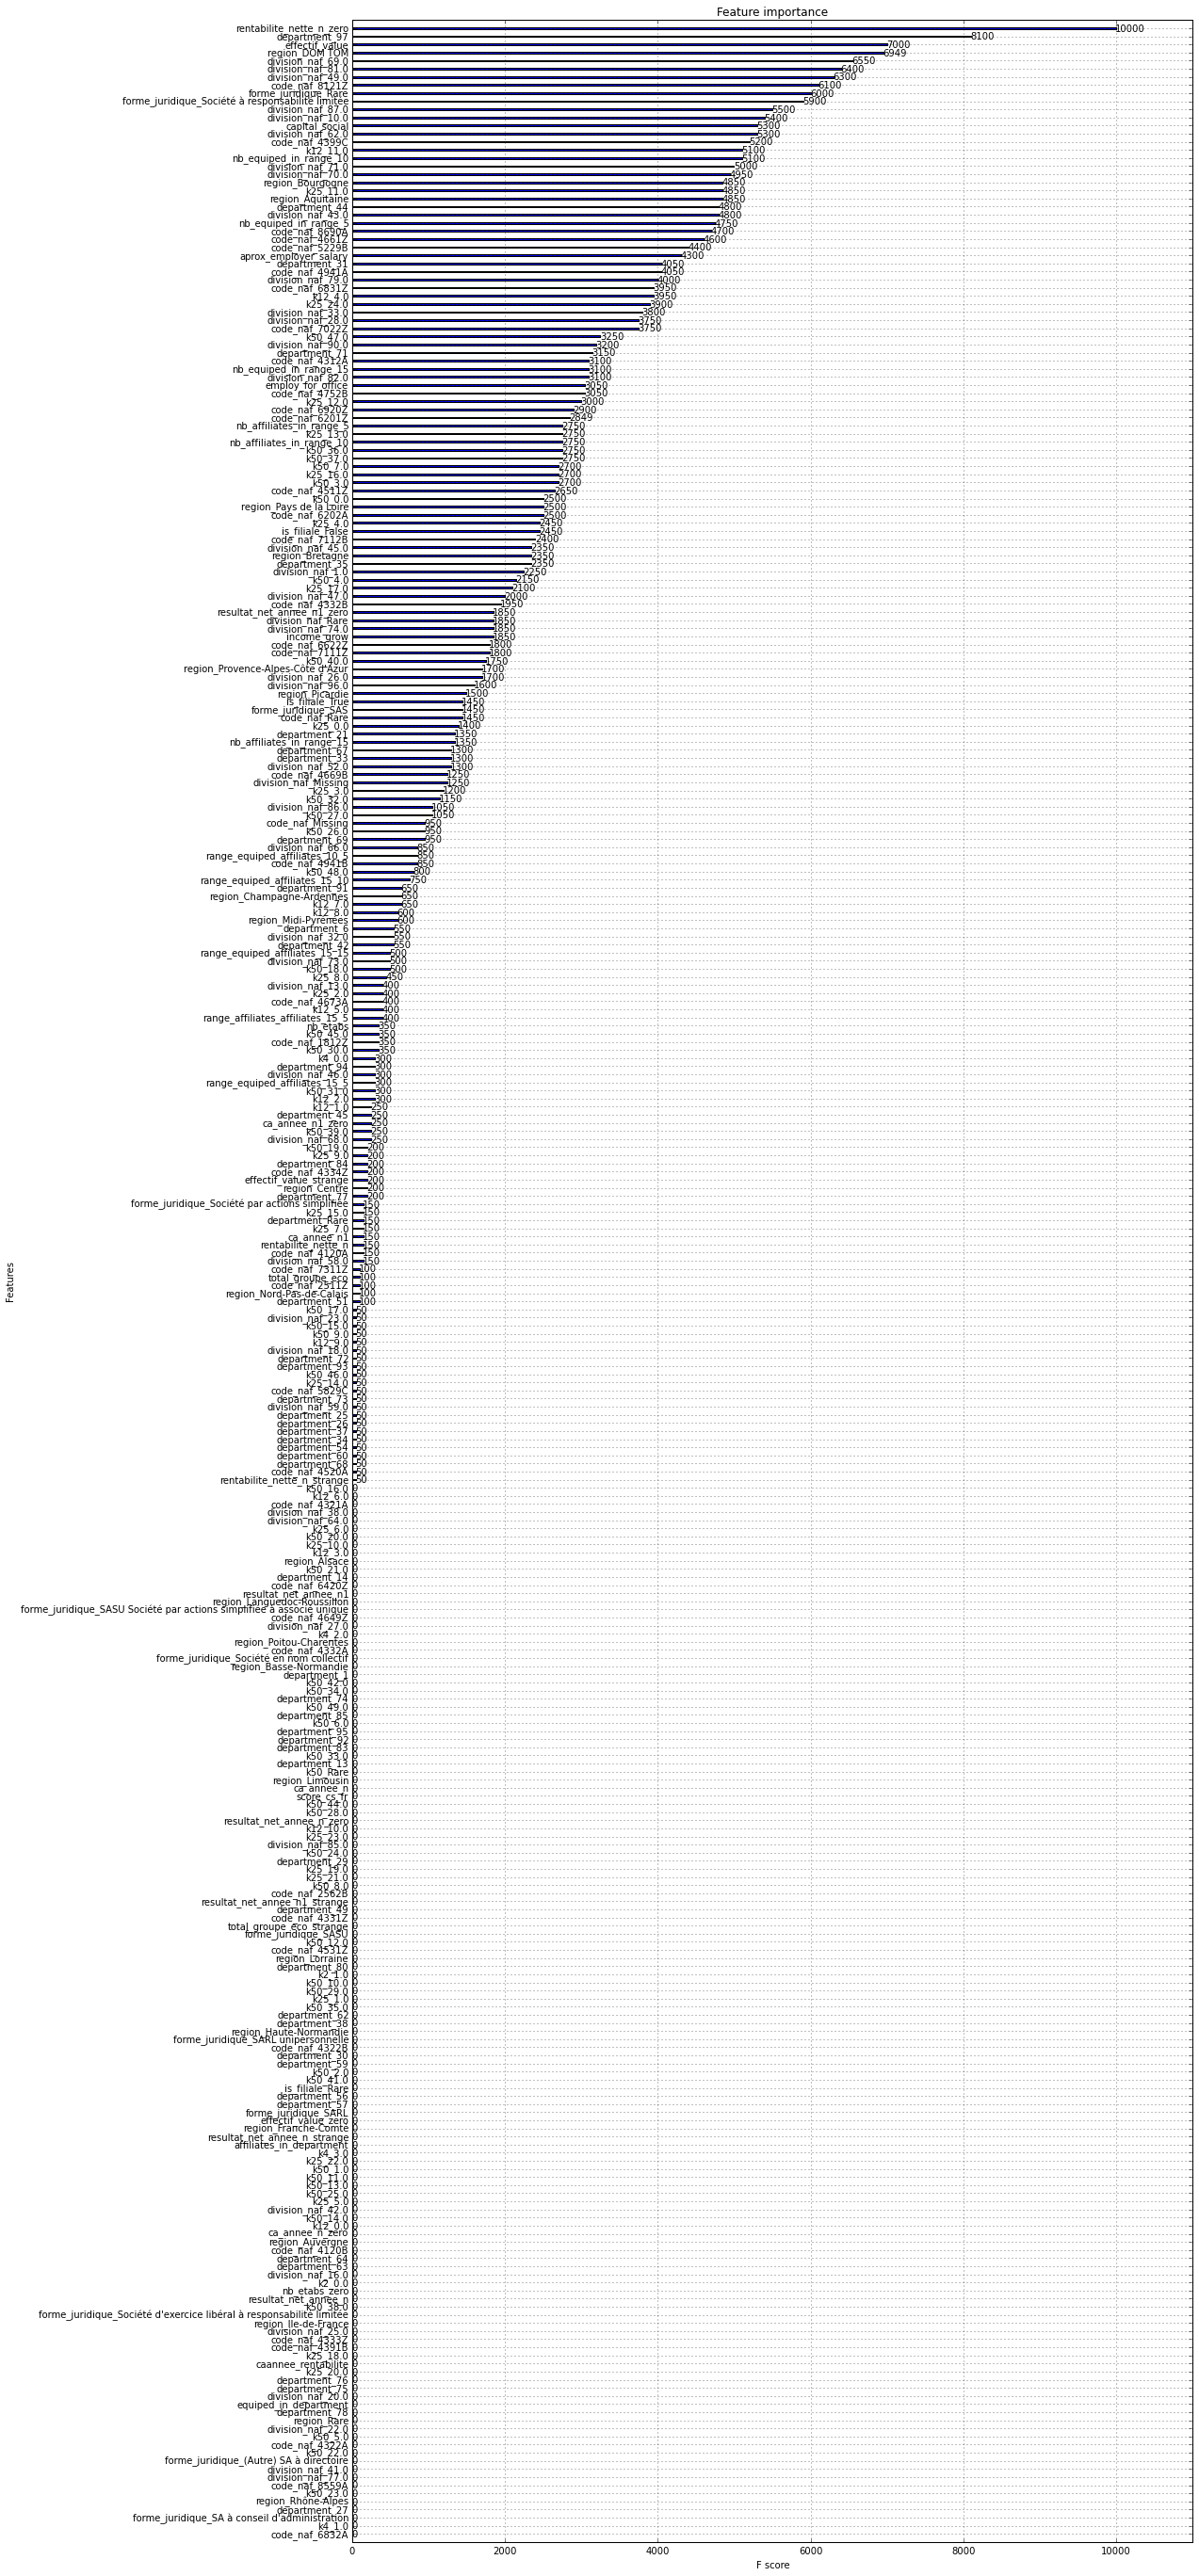

In [16]:
# feature importance
import operator
from sklearn import linear_model

feature_cols = [col for col in new_train.columns if col not in ['success']]
new_X_train = new_train[feature_cols].copy()
new_y_train_pd = new_train['success'].copy()

fig = plt.figure(figsize=(16,48))
ax1 = fig.add_subplot(1,1,1)
    
method = "randomized_regression" 
if (method == "xgboost"):
    # 9 900 0.06  <70
    gbm = xgb.XGBClassifier(silent=False, nthread=7, max_depth=9, n_estimators=900, subsample=0.5, learning_rate=0.006, seed=1337)
    gbm.fit(new_X_train, new_y_train_pd)
    bst = gbm.booster()
    imps = bst.get_fscore()
    # plot
    ax1 = xgb.plot_importance(bst, ax=ax1)

    sorted_imps = sorted(imps.items(), key=operator.itemgetter(1))
    good_scores_keys = [k for (k,v) in sorted_imps[-134:]]
    
elif (method == "randomized_regression"):
    # n_jobs > 1 can fail; bug in scikit
    feat_imps = linear_model.RandomizedLogisticRegression(n_jobs=1, tol=0.0001).fit(new_X_train, new_y_train_pd)
    importances_list = zip(new_X_train.columns, feat_imps.scores_)
    importances = dict([(k,int(v * 10000)) for (k,v) in importances_list])
    sorted_imps = sorted(importances.items(), key=operator.itemgetter(1))
    good_scores_keys = [k for (k, v) in list(reversed(sorted_imps)) if v > 100.0]
    #good_scores_keys = [k for (k,v) in list(reversed(sorted_imps))[0:100]]
    #plot
    ax1 = plot_importance(importances, ax=ax1)

good_scores_keys = good_scores_keys + ["success"]

# delete unimportance features
new_train1 = new_train.copy()    
new_train1 = new_train1[good_scores_keys]

feature_cols = [col for col in new_train1.columns if col not in ['success']]

# Final datasets
final_train, final_test = separate_datasets(new_train1, train.index, test.index)

X_train = final_train[feature_cols]
y_train_pd = final_train['success']
X_test = final_test[feature_cols]
y_test_pd = final_test['success']

len(X_train.columns)

In [14]:
# saving with new features
final_train.to_csv("newTrain.csv", sep=',', encoding='utf-8')
final_test.to_csv("newTest.csv", sep=',', encoding='utf-8')

0.663734333333 0.723311666667 0.258884
0.0045


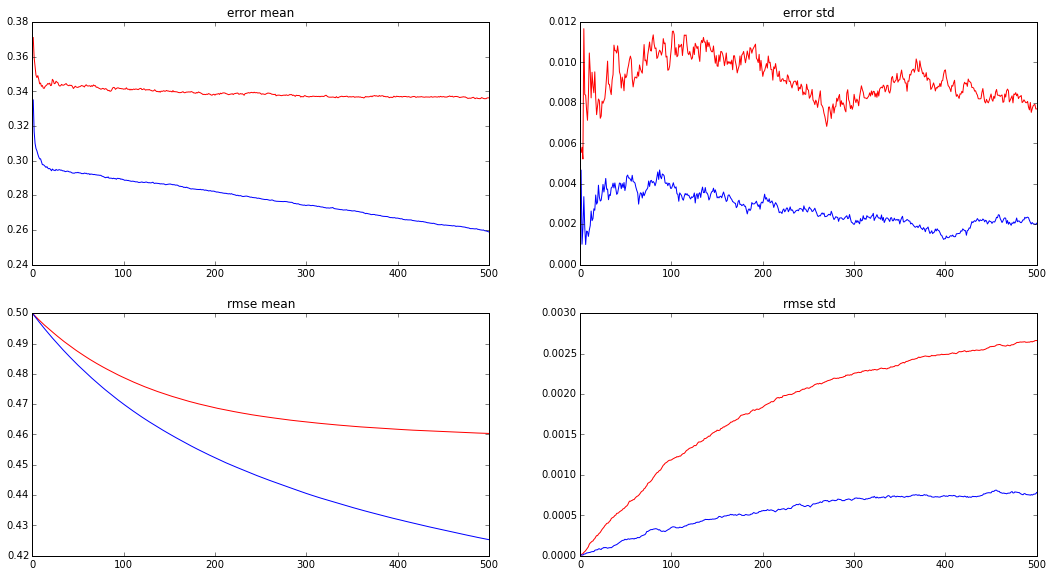

In [17]:
# parameters for xgboost
for eta in [0.0045]:
    param = {'max_depth':8, 'eta': eta, 'subsample':0.5, 'silent':0, 'objective': 'binary:logistic'}
    xgmat = xgb.DMatrix(X_train, label=y_train_pd)
    num_round = 500
    rescv = xgb.cv(param, xgmat, num_round, nfold=6,
           metrics={'error', 'logloss', 'auc','rmse'}, seed = 0)

    print str(1 - rescv['test-error-mean'].values[-1]) + " " + str(rescv['test-auc-mean'].values[-1]) + " " + str(rescv['train-error-mean'].values[-1])
    print eta

    fig = plt.figure(figsize=(18,20))

    ax = fig.add_subplot(4,2,1)
    plt.title("error mean")
    ax.plot(((np.arange(num_round)) + 1), rescv['test-error-mean'], color='red', label='test error')
    ax.plot(((np.arange(num_round)) + 1), rescv['train-error-mean'], color='blue', label='train error')
    ax2 = fig.add_subplot(4,2,2)
    plt.title("error std")
    #ax2.plot([0, num_round], [0.0033, 0.0033], '--k', label='intrinsic error')
    ax2.plot(((np.arange(num_round)) + 1), rescv['test-error-std'], color='red', label='auc')
    ax2.plot(((np.arange(num_round)) + 1), rescv['train-error-std'], color='blue', label='auc')
    ax3 = fig.add_subplot(4,2,3)
    plt.title("rmse mean")
    ax3.plot(((np.arange(num_round)) + 1), rescv['test-rmse-mean'], color='red', label='auc')
    ax3.plot(((np.arange(num_round)) + 1), rescv['train-rmse-mean'], color='blue', label='auc')
    ax4 = fig.add_subplot(4,2,4)
    plt.title("rmse std")
    ax4.plot(((np.arange(num_round)) + 1), rescv['test-rmse-std'], color='red', label='auc')
    ax4.plot(((np.arange(num_round)) + 1), rescv['train-rmse-std'], color='blue', label='auc')
    plt.show()

In [19]:
from sklearn.cross_validation import cross_val_score
from sklearn.cross_validation import cross_val_predict
from sklearn import svm
from sklearn import naive_bayes
from sklearn import linear_model
from sklearn import discriminant_analysis
from sklearn.ensemble import ExtraTreesClassifier

clf_logistic = linear_model.LogisticRegression(penalty="l2", solver="sag", dual=False, C=2)
clf_xgb = xgb.XGBClassifier(silent=False, nthread=7, max_depth=8, n_estimators=500,
                        subsample=0.5, learning_rate=0.0045, seed=0, objective="binary:logistic")
# res_crossval = cross_val_score(clf_logistic, X_train, y_train_pd, cv=20, scoring='accuracy')
# res_crossval
clf_nb = naive_bayes.BernoulliNB() # 65
clf_lda = discriminant_analysis.LinearDiscriminantAnalysis(solver="lsqr", shrinkage="auto")
clf_extrees = ExtraTreesClassifier(n_estimators=300, max_depth=10, min_samples_split=1, min_samples_leaf=1, max_features='log2')


In [20]:
res_logistic = cross_val_predict(clf_logistic, X_train, y_train_pd, cv=20)
res_xgb = cross_val_predict(clf_xgb, X_train, y_train_pd, cv=20)
res_nb = cross_val_predict(clf_nb, X_train, y_train_pd, cv=20)
res_lda = cross_val_predict(clf_lda, X_train, y_train_pd, cv=20)
res_extrees = cross_val_predict(clf_extrees, X_train, y_train_pd, cv=20)

res_logistic_pd = pd.DataFrame(res_logistic, columns=["predicted_success"], index=y_train_pd.index)
res_xgb_pd = pd.DataFrame(res_xgb, columns=["predicted_success"], index=y_train_pd.index)
res_nb_pd = pd.DataFrame(res_nb, columns=["predicted_success"], index=y_train_pd.index)
res_lda_pd = pd.DataFrame(res_lda, columns=["predicted_success"], index=y_train_pd.index)
res_extrees_pd = pd.DataFrame(res_extrees, columns=["predicted_success"], index=y_train_pd.index)

In [23]:
# condition = (X_train["nb_equiped_in_range_10"] > 0.35) & (X_train["nb_equiped_in_range_10"] < 0.55)
# X_train_cond = X_train.loc[condition]
# y_train_cond = y_train_pd.loc[condition]

X_train_nind = X_train.copy()
y_train_nind = y_train_pd.copy()
X_train_nind.index = range(0,len(X_train_nind))
y_train_nind.index = range(0,len(y_train_nind))

fold 0: max accuracy - 0.675355450237, treshold - 0.6
fold 1: max accuracy - 0.643705463183, treshold - 0.5
fold 2: max accuracy - 0.66270783848, treshold - 0.5
fold 3: max accuracy - 0.669833729216, treshold - 0.5
fold 4: max accuracy - 0.686460807601, treshold - 0.5
fold 5: max accuracy - 0.686460807601, treshold - 0.6
fold 6: max accuracy - 0.679334916865, treshold - 0.5
fold 7: max accuracy - 0.679334916865, treshold - 0.4
fold 8: max accuracy - 0.688836104513, treshold - 0.4
fold 9: max accuracy - 0.66270783848, treshold - 0.5
fold 10: max accuracy - 0.657957244656, treshold - 0.5
fold 11: max accuracy - 0.643705463183, treshold - 0.5
fold 12: max accuracy - 0.643705463183, treshold - 0.4
fold 13: max accuracy - 0.703087885986, treshold - 0.4
fold 14: max accuracy - 0.686460807601, treshold - 0.5
fold 15: max accuracy - 0.667458432304, treshold - 0.6
fold 16: max accuracy - 0.669833729216, treshold - 0.5
fold 17: max accuracy - 0.672209026128, treshold - 0.5
fold 18: max accuracy 

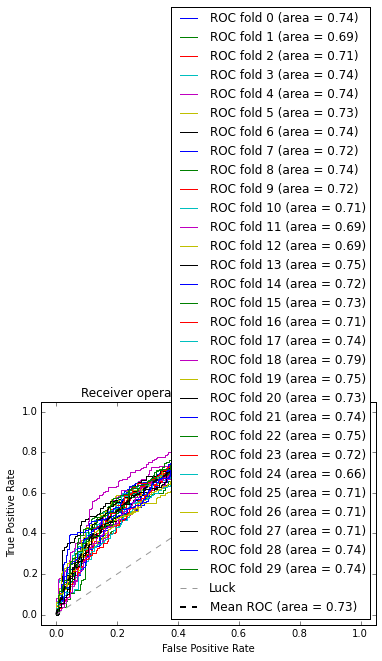

In [25]:
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.cross_validation import StratifiedKFold
from sklearn import naive_bayes
import sklearn
from scipy import interp

# Run classifier with cross-validation and plot ROC curves
cv = StratifiedKFold(y_train_nind, n_folds=30, shuffle=True)
n_samples, n_features = X_train_nind.shape
#classifier = naive_bayes.BernoulliNB()
classifier = linear_model.LogisticRegression(penalty="l2", solver="sag", dual=False, C=2)
# classifier = xgb.XGBClassifier(silent=False, nthread=7, max_depth=8, n_estimators=500,
#                         subsample=0.5, learning_rate=0.0045, seed=0, objective="binary:logistic")
mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)
all_tpr = []

for i, (train, test) in enumerate(cv):
    probas_ = classifier.fit(X_train_nind.loc[train], y_train_nind.loc[train]).predict_proba(X_train_nind.loc[test])
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y_train_nind.loc[test], probas_[:, 1])
    mean_tpr += interp(mean_fpr, fpr, tpr)
    mean_tpr[0] = 0.0
    roc_auc = auc(fpr, tpr)
    
    # print max accuracy with threshold
    y_score = probas_[:, 1]
    y_true = y_train_nind.loc[test]
    fpr, tpr, thresholds = roc_curve(y_true, y_score)
    
    accuracies = []
    thresholds = np.arange(0,1,0.1)
    for threshold in thresholds:
        y_pred = np.greater(y_score, threshold).astype(int)
        accuracy = sklearn.metrics.accuracy_score(y_true, y_pred)
        accuracies.append(accuracy)

    accuracy = np.array(accuracies)
    max_accuracy = accuracy.max() 
    max_accuracy_threshold =  thresholds[accuracy.argmax()]

    print "fold " + str(i) + ": max accuracy - " + str(max_accuracy) + ", treshold - " + str(max_accuracy_threshold)
    #
    
    plt.plot(fpr, tpr, lw=1, label='ROC fold %d (area = %0.2f)' % (i, roc_auc))

plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Luck')

mean_tpr /= len(cv)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, 'k--',
         label='Mean ROC (area = %0.2f)' % mean_auc, lw=2)

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()


Graphs with model right predict

logistic


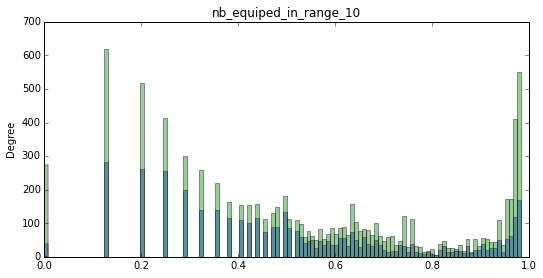

xgb


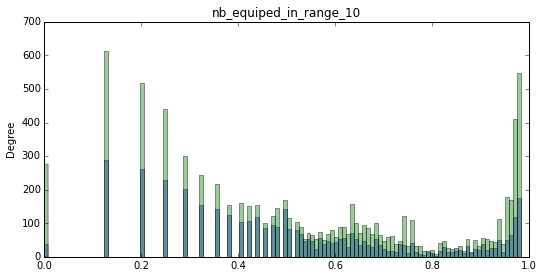

naive bayes


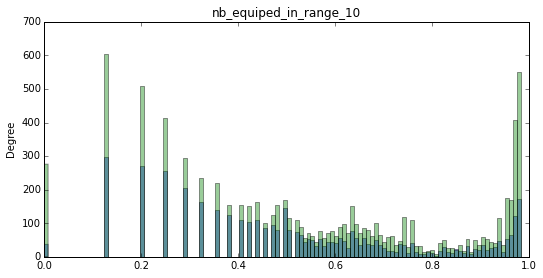

lda


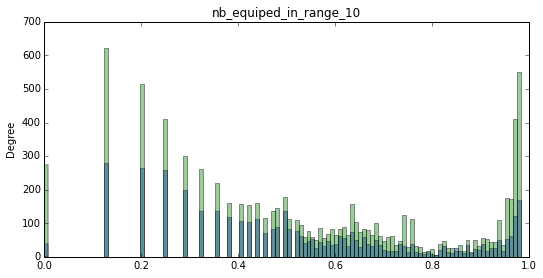

extrees


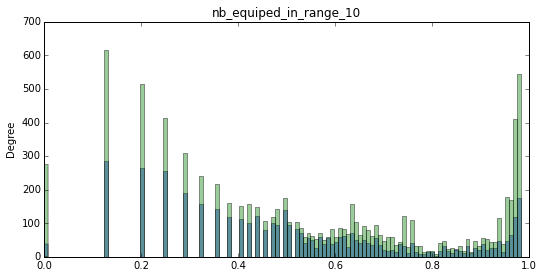

In [26]:
import math

for df_t in [('logistic', res_logistic), ('xgb', res_xgb),
             ('naive bayes', res_nb), ('lda', res_lda),
             ('extrees', res_extrees)]:
    df = df_t[1]
    title = df_t[0]
    print title
    
    final_train["success_predict"] = df == final_train["success"]
    grouped = final_train.groupby('success_predict')
    fig = plt.figure(figsize=(40,80))
    i = 0
    for col in ["nb_equiped_in_range_10"]:#numeric_columns:
        #print col
        gr = grouped[col]
        i = i + 1
        in_row = int(math.sqrt(numeric_columns.size))
        ax = fig.add_subplot(numeric_columns.size, in_row, i)
        for k, v in gr:
            plt.title(col)
            v.plot(ax=ax, kind='hist', alpha=.4, label=k, bins=120)
    plt.show()

In [22]:
len(X_train.loc[(X_train["nb_equiped_in_range_10"] > 0.35) & (X_train["nb_equiped_in_range_10"] < 0.55)])

3149

In [21]:
def accuracy_by_cond(dataset, cond):
    return metrics.accuracy_score(y_train_pd.loc[cond],
                                 dataset.loc[cond])
for df_t in [('logistic', res_logistic_pd), ('xgb', res_xgb_pd),
             ('naive bayes', res_nb_pd), ('lda', res_lda_pd),
             ('extrees', res_extrees_pd)]:
    df = df_t[1]
    title = df_t[0]
    print title + " all " + str(metrics.accuracy_score(y_train_pd, df))
    print title + " " + str(accuracy_by_cond(df, X_train["nb_affiliates_in_range_5"] < 0.8))
    print title + " " + str(accuracy_by_cond(df, X_train["nb_affiliates_in_range_5"] > 0.8))
    
    print title + " " + str(accuracy_by_cond(df, X_train["nb_equiped_in_range_5"] < 0.9))
    print title + " " + str(accuracy_by_cond(df, X_train["nb_equiped_in_range_5"] > 0.9))
    
    print title + " " + str(accuracy_by_cond(df, (X_train["nb_equiped_in_range_10"] > 0.35) & (X_train["nb_equiped_in_range_10"] < 0.55)))
    print title + " " + str(accuracy_by_cond(df, (X_train["nb_equiped_in_range_10"] < 0.35) | (X_train["nb_equiped_in_range_10"] > 0.55)))


logistic all 0.660592616067
logistic 0.64017745202
logistic 0.754549489569
logistic 0.647449712644
logistic 0.759084791386
logistic 0.594156875198
logistic 0.682677082234
xgb all 0.655442877515
xgb 0.634198090462
xgb 0.753217931647
xgb 0.642061781609
xgb 0.755720053836
xgb 0.575103207367
xgb 0.682149266336
naive bayes all 0.652669941372
naive bayes 0.630822644421
naive bayes 0.753217931647
naive bayes 0.638918821839
naive bayes 0.755720053836
naive bayes 0.584312480152
naive bayes 0.675393222844
lda all 0.660751069561
lda 0.640466775967
lda 0.754105636929
lda 0.647808908046
lda 0.757738896366
lda 0.597332486504
lda 0.681832576797
extrees all 0.649183964506
extrees 0.626097019963
extrees 0.755437194851
extrees 0.634877873563
extrees 0.756393001346
extrees 0.569387107018
extrees 0.675709912383


0.666732673267


/home/haukot/apps/anaconda/lib/python2.7/site-packages/sklearn/linear_model/sag.py:267: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/haukot/apps/anaconda/lib/python2.7/site-packages/sklearn/linear_model/sag.py:267: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/haukot/apps/anaconda/lib/python2.7/site-packages/sklearn/linear_model/sag.py:267: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/haukot/apps/anaconda/lib/python2.7/site-packages/sklearn/linear_model/sag.py:267: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


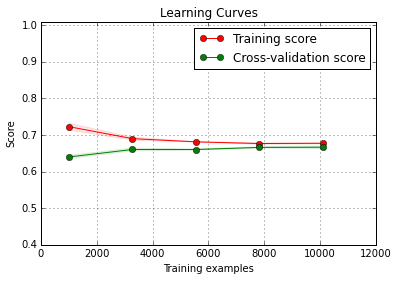

In [32]:
from sklearn.learning_curve import learning_curve
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics, linear_model, gaussian_process, neighbors, preprocessing, discriminant_analysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn import naive_bayes

#from sklearn.neural_network import MLPClassifier


def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and traning learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : integer, cross-validation generator, optional
        If an integer is passed, it is the number of folds (defaults to 3).
        Specific cross-validation objects can be passed, see
        sklearn.cross_validation module for the list of possible objects

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    print test_scores_mean[-1]
    
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
            label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt
 
# condition = (X_train["nb_equiped_in_range_10"] > 0.35) & (X_train["nb_equiped_in_range_10"] < 0.55)
# X_train_cond = X_train.loc[condition]
# y_train_cond = y_train_pd.loc[condition]

cv = cross_validation.ShuffleSplit(len(X_train), n_iter=4,
                                   test_size=0.2, random_state=0)

#estimator = tree.DecisionTreeClassifier(max_depth=8)
#not work #estimator = xgb.XGBClassifier(silent=False, nthread=7, max_depth=7, n_estimators=100, subsample=0.5, learning_rate=0.03, seed=1337)
#estimator = KNeighborsClassifier(n_neighbors=10) # 30 - 64, 10 - 63, 30 - 0.647
#estimator = ensemble.GradientBoostingClassifier(n_estimators=1000, learning_rate=0.001, max_depth=8, random_state=0)
estimator = linear_model.LogisticRegression(penalty="l2", solver="sag", dual=False, C=2) # 0.6665
#estimator = ensemble.BaggingClassifier(n_estimators=100)
#estimator = ensemble.RandomForestClassifier(max_depth=8, n_estimators=100)
#estimator = svm.SVC(gamma=1e1, C=1e-2) # 53
#estimator = naive_bayes.GaussianNB() # 65
#estimator = naive_bayes.BernoulliNB(alpha=1) # 65
#estimator = discriminant_analysis.LinearDiscriminantAnalysis(solver="lsqr", shrinkage="auto")
#estimator = ExtraTreesClassifier(n_estimators=100,  max_depth=9)
#-estimator = gaussian_process.GaussianProcessClassifier()
#estimator = svm.SVC(kernel='linear', C=1e-2, random_state=0) # 655
#estimator = ensemble.AdaBoostClassifier(n_estimators=500, learning_rate=0.2)
#estimator = discriminant_analysis.LinearDiscriminantAnalysis() # 66.4
#estimator = discriminant_analysis.QuadraticDiscriminantAnalysis() # 57

plot_learning_curve(estimator, "Learning Curves", X_train, y_train_pd, ylim=(0.4, 1.01), cv=cv, n_jobs=7)


plt.show()

In [33]:
# from sklearn.grid_search import GridSearchCV

# estimator = ExtraTreesClassifier(n_estimators=300, max_depth=10, min_samples_split=1, min_samples_leaf=1, max_features='log2')
# param_grid = [
#   {'n_estimators': [50,100,200,300,400,500]}
#  ]

# clf = GridSearchCV(estimator, param_grid, cv=10,
#                        scoring='accuracy')
# clf.fit(X_train_cond, y_train_cond)
# print(clf.best_params_)
# print(clf.best_score_)

In [36]:
### ensemble prediction
from sklearn.ensemble import VotingClassifier

# 8, 500, 0.0045 - 0.5698
clf_xgb = xgb.XGBClassifier(silent=False, nthread=7, max_depth=8, n_estimators=500,
                        subsample=0.5, learning_rate=0.0045, seed=0, objective="binary:logistic")
clf_tree = tree.DecisionTreeClassifier(max_depth=8)
clf_logistic = linear_model.LogisticRegression(penalty="l2", solver="sag", dual=False, C=2)
clf_knn = KNeighborsClassifier(n_neighbors=20)
clf_forest = ensemble.RandomForestClassifier(max_depth=8, n_estimators=100)
clf_ada = ensemble.AdaBoostClassifier(n_estimators=500, learning_rate=0.2)
clf_gnb= naive_bayes.GaussianNB()
clf_bnb = naive_bayes.BernoulliNB() 
clf_lda = discriminant_analysis.LinearDiscriminantAnalysis()
clf_linsvm = svm.SVC(kernel='linear', C=1e-2, random_state=0,  probability=True)

estimators = [
#     ('clf_tree', clf_tree),
   ('xgb', clf_xgb), # 55.8
#     ('logistic', clf_logistic), # 51
#     ('clf_knn', clf_knn),  #50
#     ('clf_forest', clf_forest), #50
    ('clf_ada', clf_ada), # 55.8
    ('clf_gnb', clf_gnb), # 55
#     ('clf_bnb', clf_bnb), #55.8
#     ('clf_lda', clf_lda), # 51
#     ('clf_linsvm', clf_linsvm) # 49 - overfit
]

clf_ensemble = VotingClassifier(estimators=estimators, voting='hard') # 0.572 with hard(ada,gnb,xgb)

clf_ensemble.fit(X_train, y_train_pd)


predicted_X_test = clf_ensemble.predict(X_test)
print metrics.accuracy_score(y_test_pd, predicted_X_test)

# clf = GridSearchCV(clf_ensemble, [{}], cv=4,
#                        scoring='accuracy')
# clf.fit(X_train, y_train_pd)
# print(clf.best_params_)
# print(clf.best_score_)

0.550279329609


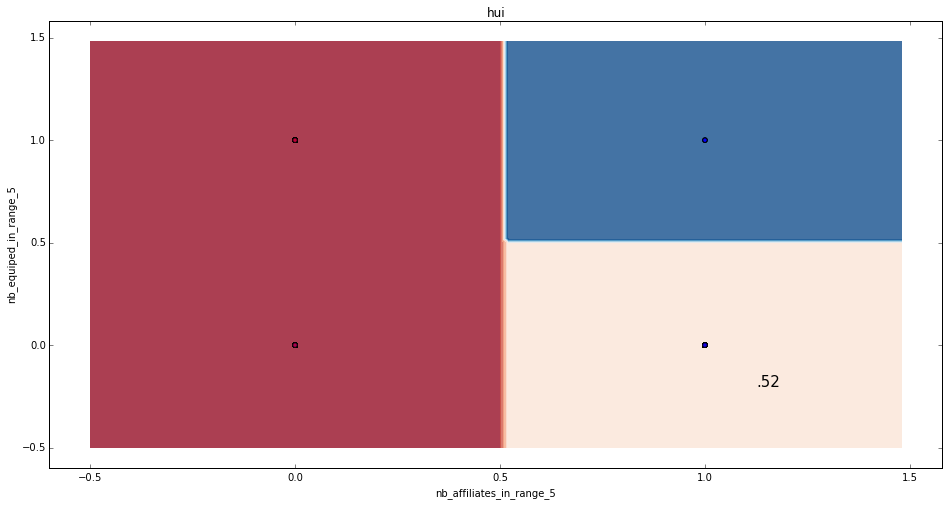

In [74]:
# not needed
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn import naive_bayes
from sklearn.lda import LDA
# import numpy as np
from IPython.display import Image
from itertools import combinations

from sklearn import metrics, linear_model, ensemble
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn import svm

def classifier_plot(clf, columns):
    # preprocess dataset, split into training and test part
    h = .02  # step size in the mesh

#     X = new_train[columns].values[:, :2]
#     y = new_train["success"].values
    X = X_train_cond.values[:, :2]
    y = y_train_cond.values

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])

    fig = plt.figure(figsize=(16,8))
    # Plot the training points
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
    # and testing points
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6)
    #plt.set_xlim(xx.min(), xx.max())
    #plt.set_ylim(yy.min(), yy.max())
    #plt.set_xticks(())
    #plt.set_yticks(())


    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].
    if hasattr(clf, "decision_function"):
        Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    else:
        Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=cm, alpha=.8)

    # Plot also the training points
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
    # and testing points
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
               alpha=0.6)

    #plt.set_xlim(xx.min(), xx.max())
    #plt.set_ylim(yy.min(), yy.max())
    #plt.set_xticks(())
    #plt.set_yticks(())
    plt.title("hui")
    plt.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
            size=15, horizontalalignment='right')
    
    plt.xlabel(columns[0])
    plt.ylabel(columns[1])
    
    plt.show()

columns = [
#"nb_equiped_in_range_10",
"nb_equiped_in_range_15",
#"division_naf",
#"hui12",
#"nb_affiliates_in_range_15",
"effectif_value",
"nb_affiliates_in_range_10",
#"nb_equiped_in_range_5",
#"hui3",
#department",
#"code_naf",
#"nb_affiliates_in_range_5",
"score_cs_fr",
"capital_social",
#ca_annee_n1",
#"ca_annee_n",
#"hui7",
#forme_juridique"
]

cols = [i for i in combinations(columns, 2)]

clf = tree.DecisionTreeClassifier(max_depth=7)
#clf = ensemble.GradientBoostingClassifier(n_estimators=1000, learning_rate=0.001, max_depth=7, random_state=0)
#clf = ensemble.RandomForestClassifier(n_estimators=100, max_depth=7, n_jobs=2, class_weight="subsample")
#clf = ensemble.AdaBoostClassifier(n_estimators=1000)
#clf = linear_model.LogisticRegression(penalty="l1", dual=False, C=1.)
#clf = svm.SVC(gamma=1e1, C=1e-2)
#clf = LDA()
#clf = KNeighborsClassifier(n_neighbors=10)
#clf = naive_bayes.GaussianNB()
#clf = naive_bayes.BernoulliNB()
# Example graphs of one variable from another
# for col in cols:
#     classifier_plot(clf, [col[0], col[1]])


classifier_plot(clf, ['nb_affiliates_in_range_5', 'nb_equiped_in_range_5'])
    


Try deeplearning algo from H2O

In [4]:
import h2o
from h2o.estimators.glm import H2OGeneralizedLinearEstimator
from h2o.estimators.gbm import H2OGradientBoostingEstimator
from h2o.estimators.random_forest import H2ORandomForestEstimator
from h2o.estimators.deeplearning import H2ODeepLearningEstimator

In [5]:
h2o.init()

H2O cluster uptime:,1 hours 45 minutes 14 seconds 265 milliseconds
H2O cluster version:,3.6.0.3
H2O cluster name:,haukot
H2O cluster total nodes:,1
H2O cluster total memory:,2.58 GB
H2O cluster total cores:,8
H2O cluster allowed cores:,8
H2O cluster healthy:,True
H2O Connection ip:,127.0.0.1
H2O Connection port:,54321


In [6]:
model = H2ODeepLearningEstimator(activation = "Rectifier", hidden = [200,200], epochs = 10)

In [32]:
h2o_X_train = h2o.H2OFrame(X_train.values.tolist())
h2o_X_test = h2o.H2OFrame(y_train_pd.values.tolist())


Parse Progress: [##################################################] 100%

Parse Progress: [##################################################] 100%


In [33]:
model.train(x=X_train.columns.tolist(), y="success", training_frame=h2o_X_train)

ValueError: Found arrays with inconsistent numbers of samples: [  146 12622]

In [8]:
 import inspect
    
inspect.getmembers(H2ODeepLearningEstimator, predicate=inspect.ismethod)


[('__init__', <unbound method H2ODeepLearningEstimator.__init__>),
 ('__repr__', <unbound method H2ODeepLearningEstimator.__repr__>),
 ('_compute_algo', <unbound method H2ODeepLearningEstimator._compute_algo>),
 ('_model_build', <unbound method H2ODeepLearningEstimator._model_build>),
 ('_plot', <unbound method H2ODeepLearningEstimator._plot>),
 ('_resolve_model', <unbound method H2ODeepLearningEstimator._resolve_model>),
 ('aic', <unbound method H2ODeepLearningEstimator.aic>),
 ('auc', <unbound method H2ODeepLearningEstimator.auc>),
 ('biases', <unbound method H2ODeepLearningEstimator.biases>),
 ('build_model', <unbound method H2ODeepLearningEstimator.build_model>),
 ('catoffsets', <unbound method H2ODeepLearningEstimator.catoffsets>),
 ('coef', <unbound method H2ODeepLearningEstimator.coef>),
 ('coef_norm', <unbound method H2ODeepLearningEstimator.coef_norm>),
 ('deepfeatures', <unbound method H2ODeepLearningEstimator.deepfeatures>),
 ('download_pojo', <unbound method H2ODeepLearning

In [ ]:
train_r2_dl = dl0.model_performance(train).r2()
test_r2_dl  = dl0.model_performance(test ).r2()
hold_r2_dl  = dl0.model_performance(hold ).r2()

header = ["Model", "R2 TRAIN", "R2 TEST", "R2 HOLDOUT"]
h2o.H2ODisplay([["DL ", train_r2_dl,  test_r2_dl,  hold_r2_dl]], header)